# Описание модели

Агентная модель многоотраслевой экономики. Единственные агенты в этой модели - __фирмы__. То, с помощью чего они между собой взаимодействуют, называется __рынком__.

## Рынок

Характеризуется двумя матрицами - матрицами объёмов ($V$) и цен ($P$). Также на рынках хранится выручка фирм, каждая фирма получает эту выручку к началу своего хода. 
Для экономики с $n$ агентами и $k$ отраслями, эти матрицы будут выглядеть так:

$$V = \begin{pmatrix} 
V_{1, 1} \cdots V_{1, j} \cdots V_{1, k} \\
\vdots  \quad  \ddots \quad \quad  \vdots \\
V_{i, 1} \cdots  V_{i, j} \cdots V_{i, k} \\
\vdots \quad  \quad  \ddots \quad \vdots \\
V_{n, 1} \cdots V_{n, j} \cdots V_{n, k} \\
\end{pmatrix}, \quad P = \begin{pmatrix} 
P_{1, 1} \cdots P_{1, j} \cdots P_{1, k} \\
\vdots  \quad  \ddots \quad \quad  \vdots \\
P_{i, 1} \cdots  P_{i, j} \cdots P_{i, k} \\
\vdots \quad  \quad  \ddots \quad \vdots \\
P_{n, 1} \cdots P_{n, j} \cdots P_{n, k} \\
\end{pmatrix}$$

$V_{i, j}$ - объёмы на рынке у фирмы $i$ на товар $j$. $P_{i, j}$ - цены на рынке у фирмы $i$ на товар $j$


## Фирма (Агент)

### Характеристика 

#### Любой фирмы

Фирма характеризуется:

- Производственной функцией: $f_{prod}(\vec{x}_{in}) = \vec{x}_{out}$. $\vec{x}_{in}=(x_1, \ldots, x_j, \ldots x_k)$ - вектор входа. $\vec{x}_{out}$ - вектор выхода

- Вектором наличных объёмов товаров, или резервов (запасов): $\vec{res} = (res_1, , \ldots res_j, \ldots res_k)$. Часть этих запасов (или, при желании, все) можно израсходовать на производство. 

- Финансовыми ресурсами $m$. Это деньги, они нужны, чтобы покупать товары на рынке. Получить деньги можно, если выставить свои товары на рынок и их кто-то купит.

- Политикой, принимающей на вход состояние и возвращающей действия. $\pi_i(P, V, \vec{res}_i, m_i, \mathcal{K}) \rightarrow (A_i^{buy}, \vec{a}_i^{use}, \vec{a}_i^{sale}, \vec{a}_i^{prices})$. Подробнее о действиях будет ниже.

#### Фирмы с основным капиталом

- Основным капиталом (лимитом): $\mathcal{K}$, задающий максимальные производственные объёмы. Основной капитал $K_{t}$, приобретенный в некотором периоде, существует на протяжении некоторого количества ходов $d$. Таким образом, объём основного капитала фирмы $i$ на момент времени {t}: $\mathcal{K}_{i} = \sum_{\tau=t-d}^t \mathcal{K}_{i, \tau}$.


- Производственной функцией: $f_{prod}(\vec{x}_{in}, \mathcal{K}) = \min\{f_{prod}(\vec{x}_{in}), \mathcal{K}\} = \vec{x}_{out}$

- Инвестиционной функцией: $f_{invest}(\vec{x}_{in}) = \mathcal{K}_{new}$


## Гиперпараметры среды

Как мы знаем, ex nihilo nihil fit. Нужно, чтобы, во-первых, у фирм было, из чего производить, и, во-вторых, у фирм было, на что покупать. Если бы в среде были нулевые изначальные финансовые ресурсы, там был бы невозможен обмен, а в случае нулевых начальных резервов невозможно производство. 


- Начальные резервы фирм: $\vec{res}_0$

- Начальные цены $P_0$. Эти цены существуют до первого хода каждой из фирм, после - цены назначаются фирмами

- Начальные финансовые ресурсы фирм $m_0$. 

- Начальные объёмы основного капитала $\mathcal{K}_0$

- Время существования основного капитала $d$

- Максимальные и минимальные возможные цены. С минимально возможными ценами всё понятно. Максимально-возможные цены в простейшем случае 

## Шаг среды

За один шаг среды в некотором порядке ходят все фирмы. Порядок может быть любым. 

### Ход фирмы i

- Фирма $\eta$ получает наблюдение $o_\eta=(P, V, \vec{res}_\eta, m_\eta, \mathcal{K}, \mathcal{K}_{-d})$. То есть, наблюдения фирмы состоят из матрицы цен ($P$), матрицы объёмов ($V$), текущих запасов фирмы $\eta$, денег $m_\eta$, объёмов основного капитала $\mathcal{K}_\eta$

- Фирма применяет свою текущую политику к наблюдению: $\pi_\eta(o_\eta) = (A_i^{buy}, \vec{a}_i^{use}, \vec{a}_i^{sale}, \vec{a}_i^{prices})$, получая действия.

    - $A^{buy} \in \mathbb{R}^{n \times k}$. Отвечает за распределение денежных ресурсов на покупки на рынка. $0 < \sum_j^{k} \sum_l^n A_{l, j}^{buy} < 1$. Изначально этот вектор генерируется многомерным распределением Дирихле, размерность $n\cdot k + 1$, сумма элементов равна единице. Последний элемент отвечает за долю сберегаемых финансовых ресурсов
    
    - $\vec{a}^{use} \in \mathbb{R}^{k}$. В случае, если есть основной капитал, то есть два веткора $a^{use}_{prod}$ и $a^{use}_{invest}$. Отвечает за то, какую долю каждого из резервов потратить. Также моделируется распределением Дирихле, поскольку для инвестиций и для производства используются одни и те же резервы. Часть резервов может сберегаться. $0 < \sum^k_j \vec{a}_j^{use} < 1$
    
    - $\vec{a}^{sale} \in \mathbb{R}^{k}$. Отвечает за долю каждого из резервов на продажу (имеющихся на момент после покупок, инвестиций и производства). Моделируется с помощью Бета-распредения. $0 < \vec{a}_j^{sale} < 1$.
    
    - $\vec{a}^{prices} \in \mathbb{R}^{k}$. Это цены, которые назначает фирма. Моделируются с помощью бета-распределения. Изначальные величины принимают значения $[0, 1]$, затем масштабируются в $[p_{min}, p_{max}]$
    
- __Покупки__
    
    - Выясняется объём товаров
        $$V^{bought}_{i, j} \gets \min \{m_\eta \cdot \frac{A^{buy}_{i, j}}{P_{i, j}}, \, V_{i, j} \}$$
    
    - Финансы фирмы уменьшаются: 
    
        $$m_\eta \gets m_\eta - \text{tr}(P^T V^{bougth})$$
        
    - Остальные фирмы получают вознаграждения 
        $$m_{i} \gets m_{i} + \langle V^{bougth}_i, P_i \rangle$$
        
    - Пополняются резервы фирмы
    
        $$\vec{res}_j^\eta \gets \vec{res}_j^\eta + \sum_{i}^k V^{bought}_{i, j}$$
- __Инвестиции__ (Опционально)
    
    - Определяются резервы, идущие на инвестиции _(считается одновременно с производством)_: $$\vec{x}_{invest} \gets \vec{res} \odot a^{use}_{invest}$$
    
    - Производятся новые лимиты 
        $$\mathcal{K}_{t}^\eta \gets f^\eta_{invest}(\vec{x}_{invest})$$
    
    - Новые лимиты добавляются. 
        $$\mathcal{K}^\eta \gets \mathcal{K}^\eta + \mathcal{K}_t^\eta$$
    
    - Из резервов вычетаются те, которые пошли на инвестиции в основной капитал:
        $$\vec{res}^\eta \gets \vec{res}^\eta - \vec{x}_{invest}$$
- __Производство__
    
    - Определяются резервы, идущие на производство _(считается одновременно с инвестициями)_: $$\vec{x}_{in} \gets \vec{res} \odot a^{use}_{prod}$$
    
    - Производятся новые ресурсы (после инвестиций)
        $$\vec{x}_{out} \gets f^\eta_{prod}(\vec{x}_{in})$$

    - Обновляются резервы 
        $$\vec{res}^\eta \gets \vec{res}^\eta +  \vec{x}_{out} - \vec{x}_{in} $$
    
- __Выставление товаров на рынок__

    - Определяются резервы, идущие на рынок (после производства и инвестиций):
    
    $$\vec{x}_{sale} \gets \vec{res} \odot a^{sale}$$
    
    - В матрице товаров осуществляется приращение:
    $$V_\eta \gets V_\eta + \vec{x}_{sale}$$
        
    - Резервы фирмы уменьшаются на величину, выставленную на рынок
    
    $$\vec{res}^\eta \gets \vec{res}^\eta - \vec{x}_{sale}$$
    
    
- __Назначение цен__:    
    - Цены на рынке у фирмы $\eta$ меняются
    
    $$P_\eta \gets a^{prices} \cdot (p_{max} - p_{min}) + p_{min}$$
    
    - Опционально можно сделать так, чтобы цены менялись только в процентах, и были более стабильными. Интервал изменений за период: [-50%, +100%]. Функция подобрана так, чтобы для $x \in [0, 1]$:
    $$\begin{cases}
        f(x) \cdot f(1-x) \approx 1\\
        f(0.0) = 0.5 \\
        f(0.5) = 1.0 \\
        f(1.0) = 2.0 \\
        \end{cases}$$
    
- __Изнашивание__ (Опционально)
    
    - Капитал с истекшим сроком давности пропадает:
    
    $$\mathcal{K}^\eta \gets \mathcal{K}^\eta - \mathcal{K}^\eta_{t-d}$$


## Нюансы

- Все объёмы, цены, финансы, резервы, лимиты - целые числа. Доли - в действительных, при домножении они безопасно округляются. Мотивация - избежание ошибки с плавающей запятой.

- Используется MAPPO. Среда векторизована. Это означает, что когда ходит одна фирма, одновременно может ходить ещё батч фирм в параллельных симуляциях (например, в 512). На инференсе батч сокращается до размера 1. 

- Пока что я работаю только с Леонтьевскими производственными функциями

- Фирма может покупать товары у себя.

- Ценовая дискриминация в данной модели не допускается.

- seed реально влияет на траекторию обучения. При неудачном может выйти не очень.

# Описание экспериментов

Для того, чтобы проверить адекватность фреймворка, было принято решение для начала посмотреть, как будет идти обучение агентов, если игра будет не с нулевой суммой. 
Оказывается, что если сделать всё аккуратно, подобрать наилучший алгоритм для данной задачи (Multi-Agent Proximal Policy Optimization) и соблюсти кучу нюансов (https://iclr-blog-track.github.io/2022/03/25/ppo-implementation-details/), то агенты добросовестно будут максимизировать награду. Другие алгоритмы обучения с подкреплением (off-policy) (Multi-Agent Soft Actor Critic) показали худшие результаты, чем MAPPO (on-policy), с которым вышло и быстрее, и стабильнее, и награды выше.  


## 0. Подготовка

- Определяются гиперпараметры рынка

- Определяются гиперпараметры моделей

## 1. Обучение

Модель обучается, каждая по 1000 эпох. При этом учитывается опыт ограниченного числа шагов в средах (по 32, в данном примере). 

Есть три вида наград для фирм:


- Производственная. При обучении на такую награду достигается кооперативное поведение фирм, производство растёт. 

$$r_t = \sum_j \vec{x}_j^{out}$$


- Финансовая. При обучении на такую награду модель приходит к равновесию, где никто не покупает товары у контрагентов.
$$r_t = \text{revenue}_{t+1} - \text{costs}_t$$


- Смешанная. Эта награда приводит к более неожиданному поведению. Интуитивная интерпретация: фирмам важны и финансовые показатели, и номинальные объёмы производства. 
$$r_t = \text{revenue}_{t+1} - \text{costs}_t + \alpha \cdot \sum_j \vec{x}_j^{out}$$

При обучении ниже порядок ходов по умолчанию фиксирован, хотя его можно сделать перемешивающимся, чтобы фирмы предполагали, что после них может ходить кто угодно.

## 2. Симуляция

Для оценки обученных политик запускается симуляция. Там данные по динамике среды на каждый временной шаг. 
Политика фирм визуализируется с помощью heatmap, что очень удобно, поскольку переменные, отвечающие за действия, находятся в интервале [0, 1]. По оси $x$ временные шаги с точки зрения _фирм_.

Здесь отображаются 90% доверительные интервалы для переменных, скользящие средние (window=5), по действиям берутся средние значения.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
from environment_batched import BatchedLeontief, BatchedEnvironment
from models.policy import BetaPolicyNetwork
from models.utils import get_state, get_state_dim, process_actions, get_action_dim
from trainer import TrainerAC, TrainerSAC, TrainerPPO
from utils.plotting_tikz import plot_environment_batch, plot_volumes_batch, plot_actions_batch, plot_loss_batch

In [11]:
torch.manual_seed(123)
torch.backends.cudnn.deterministic = True
device = 'cuda'
# Гиперпараметры рынка
market_kwargs = dict(
    start_volumes=10,      # У всех фирм в резервах изначально 4 товара А и 10 товара Б
    base_price=50,         # Изначальные цены на рынке - 50 
    start_gains=500,       # Изначальные финансовые ресурсы у каждой фирмы - 500
    deprecation_steps=2,   # За сколько ходов износится основной капитал
    min_price=1,           # Минимальная возможная цена на рынке
    max_price=100          # Максимальная возможная цена на рынке
)
num = 1 

In [5]:
# Производственные функции
prod_functions = [
    BatchedLeontief(torch.tensor([0, 1]), torch.tensor([2, 0]), device=device),  # 0 товара А + 1 товар  Б => 2 товара А.
    BatchedLeontief(torch.tensor([1, 0]), torch.tensor([0, 2]), device=device),  # 1 товара А + 0 товара Б => 2 товара Б 
]

# Инвестиционные функции
invest_functions = [
    BatchedLeontief(torch.tensor([1, 1]), torch.tensor(2), device=device),
    BatchedLeontief(torch.tensor([1, 1]), torch.tensor(2), device=device),
]

env_kwargs = dict(
     device=device,
     batch_size=512
)
trainer_kwargs = dict(
     learning_rates=(3e-3, 3e-4),
     batch_size=512,
     entropy_reg=0.01,
     buffer_size=8192 * 64,
     device=device,
     entropy_gamma=0.999,
     lr_gamma=0.991,
     common_optimizer=True
)
train_kwargs = dict(
    n_epochs=100, episode_length=32, debug_period=10000
)

In [6]:
env = BatchedEnvironment(market_kwargs,
                         BetaPolicyNetwork,
                         prod_functions,
                         invest_functions=None,
                         target='production',
                         production_reg=0,
                         **env_kwargs
                        )
trainer = TrainerPPO(env, **trainer_kwargs)

# Первый эксперимент.


__Цель__: каждая фирма стремится максимизировать собственные номинальные дисконтированные объёмы выпуска. 

__Лимиты__: нет


## Подробности:

- $$r_t = \log\Big(0.5 + \sum_{j} (\vec{x}_{out} - \vec{x}_{in})_j\Big)$$

- $$f^{prod}_1(\vec{x}) = (0, 2 \vec{x}_1)$$

- $$f^{prod}_2(\vec{x}) = ( 2 \vec{x}_1, 0)$$


## Результаты:

- Фирмы стараются держать низкие цены на свои товары. Цены на товары контрагента выглядят случайными. 

- Фирмы стараются покупать только то, что нужно на производство

- Сделки на большую часть портфеля совершаются контрагентом

- Большую часть резервов фирмы расходуют на производство

- Фирмы продают большую часть товаров, которые они производят

- Производство в общем растёт

In [8]:
trainer.train(**train_kwargs)
env.reset()
n_periods = 64
for i in range(n_periods):
    env.step_and_record_batch(i % env.market.n_firms)
plot_loss_batch(trainer.df_list)
plot_environment_batch(env.state_history, num=num)
plot_volumes_batch(env.state_history, num=num)
plot_actions_batch(env.actions_history[0], 'policy1', num=num)
plot_actions_batch(env.actions_history[1], 'policy2', num=num)

/home/vladimir/PycharmProjects/diploma/trainer/base_trainer.py:185: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()


# Второй эксперимент

__Цель__: каждая фирма стремится максимизировать собственные номинальные дисконтированные объёмы выпуска. 

__Лимиты__: есть

## Подробности:
- $$r_t = \log\Big(0.5 + \sum_{j} (\vec{x}_{out} - \vec{x}_{in})_j\Big)$$

- $$f^{prod}_1(\vec{x}, \mathcal{K}_1) = (0, 2 \cdot \min \{\vec{x}_2, \mathcal{K}_1 \})$$

- $$f^{prod}_2(\vec{x}, \mathcal{K}_2) = (2 \cdot \min \{\vec{x}_1, \mathcal{K}_2 \}, 0)$$

In [12]:

env = BatchedEnvironment(market_kwargs,
                         BetaPolicyNetwork,
                         prod_functions,
                         invest_functions=invest_functions,
                         target='production',
                         production_reg=0,
                         **env_kwargs
                        )
trainer = TrainerPPO(env, **trainer_kwargs)

In [ ]:
trainer.train(**train_kwargs)
env.reset()
n_periods = 64
for i in range(n_periods):
    env.step_and_record_batch(i % env.market.n_firms)
plot_loss_batch(trainer.df_list)
plot_environment_batch(env.state_history, num=num)
plot_volumes_batch(env.state_history, num=num)
plot_actions_batch(env.actions_history[0], 'policy1', num=num)
plot_actions_batch(env.actions_history[1], 'policy2', num=num)
num += 1

/home/vladimir/PycharmProjects/diploma/trainer/base_trainer.py:185: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()
 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 77/100 [00:24<00:07,  3.02it/s, LR=0.00015, Order=[0, 1]]

# Третий

__Цель__: каждая фирма стремится максимизировать прибыль. Реальные величины в функции награды фирмы не участвуют.

__Лимиты__: нет

__Порядок ходов__: [0, 1]

## Подробности:
- $$r_t = \text{revenue}_{t+1} - \text{costs}_{t}$$

- $$f^{prod}_1(\vec{x}) = (0, 2 \vec{x}_1)$$

- $$f^{prod}_2(\vec{x}) = ( 2 \vec{x}_1, 0)$$

## Результаты:

- Фирмы выставляют товары на рынок. 

- Фирмы покупают товары у себя, почти никогда не покупают товары у контрагента

- Цены выглядят непредсказуемыми. При пересечении двукратном пересечении графиков цен между периодами (10-20) началось производство. 

- Производство почти не расширяется. Любые расширения -- результат стохастичной природы политики и не являются систематическими.

- Фирмы усвоили, какие у них производственные функции, и стараются производить по-максимиму. 

- Стратегия "не покупать ничего у контрагента" является нэш-равновесием в этой модели.

In [9]:
env = BatchedEnvironment(market_kwargs,
                         BetaPolicyNetwork,
                         prod_functions,
                         invest_functions=None,
                         target='finance',
                         production_reg=0,
                         **env_kwargs
                        )
trainer = TrainerPPO(env, **trainer_kwargs)

In [ ]:
trainer.train(**train_kwargs)
env.reset()
n_periods = 64
for i in range(n_periods):
    env.step_and_record_batch(i % env.market.n_firms)
plot_loss_batch(trainer.df_list)
plot_environment_batch(env.state_history, num=num)
plot_volumes_batch(env.state_history, num=num)
plot_actions_batch(env.actions_history[0], 'policy1', num=num)
plot_actions_batch(env.actions_history[1], 'policy2', num=num)
num += 1

# Эксперимент 4


__Цель__: каждая фирма стремится максимизировать прибыль. Реальные величины в функции награды фирмы не участвуют.

__Лимиты__: есть

__Порядок ходов__: [0, 1]

## Подробности:
- $$r_t = \text{revenue}_{t+1} - \text{costs}_{t}$$

- $$f^{prod}_1(\vec{x}, \mathcal{K}_1) = (0, 2 \cdot \min \{\vec{x}_2, \mathcal{K}_1 \})$$

- $$f^{prod}_2(\vec{x}, \mathcal{K}_2) = (2 \cdot \min \{\vec{x}_1, \mathcal{K}_2 \}, 0)$$


## Результаты (как в эксперименте 3):

- Фирмы не расширяют лимиты. 

- Производство почти не расширяется. Любые расширения -- результат стохастичной природы политики и не являются систематическими.

- Фирмы усвоили, какие у них производственные функции, и стараются производить по-максимиму. 

- У одной фирмы завышенные цены, у другой - заниженные. Но никто ничего не покупает.

- Стратегия "не покупать ничего у контрагента" является нэш-равновесием в этой модели.

In [ ]:
env = BatchedEnvironment(market_kwargs,
                         BetaPolicyNetwork,
                         prod_functions,
                         invest_functions=invest_functions,
                         target='finance',
                         production_reg=0,
                         **env_kwargs
                        )
trainer = TrainerPPO(env, **trainer_kwargs)

In [ ]:
trainer.train(**train_kwargs)
env.reset()
n_periods = 64
for i in range(n_periods):
    env.step_and_record_batch(i % env.market.n_firms)
plot_loss_batch(trainer.df_list)
plot_environment_batch(env.state_history, num=num)
plot_volumes_batch(env.state_history, num=num)
plot_actions_batch(env.actions_history[0], 'policy1', num=num)
plot_actions_batch(env.actions_history[1], 'policy2', num=num)
num += 1

# Эксперимент 5

__Цель__: каждая фирма стремится максимизировать прибыль. Но в функции награды есть бонус за объёмы производства. 

__Лимиты__: есть

__Порядок ходов__: [0, 1]

## Подробности:
- $$r_t = \text{revenue}_{t+1} - \text{costs}_{t} + \alpha  \cdot \sum_j \vec{x}_{t, j}^{out}$$

- $$f^{prod}_1(\vec{x}, \mathcal{K}_1) = (0, 2 \cdot \min \{\vec{x}_2, \mathcal{K}_1 \})$$

- $$f^{prod}_2(\vec{x}, \mathcal{K}_2) = (2 \cdot \min \{\vec{x}_1, \mathcal{K}_2 \}, 0)$$
## Результаты:

- Производство есть, оно растёт

- Агенты торгуют друг с другом, но на небольшую часть портфеля. 

- Одна из фирм держит максимальные цены на товар контрагента, вторая фирма так не делает. На остальные товары, как правило, фирмы держат минимальные цены, но та фирма, у которой финансовых ресурсов меньше, периодически поднимает их на короткий промежуток времени. 

- Есть тенденция накапливать резервы товара, производимого контрагентом


In [ ]:
torch.manual_seed(777)
env = BatchedEnvironment(market_kwargs,
                         BetaPolicyNetwork,
                         prod_functions,
                         invest_functions=invest_functions,
                         target='finance',
                         production_reg=15,
                         **env_kwargs
                        )
trainer = TrainerPPO(env, **trainer_kwargs)

In [ ]:
trainer.train(**train_kwargs)
env.reset()
n_periods = 64
for i in range(n_periods):
    env.step_and_record_batch(i % env.market.n_firms)
plot_loss_batch(trainer.df_list)
plot_environment_batch(env.state_history, num=num)
plot_volumes_batch(env.state_history, num=num)
plot_actions_batch(env.actions_history[0], 'policy1', num=num)
plot_actions_batch(env.actions_history[1], 'policy2', num=num)
num += 1

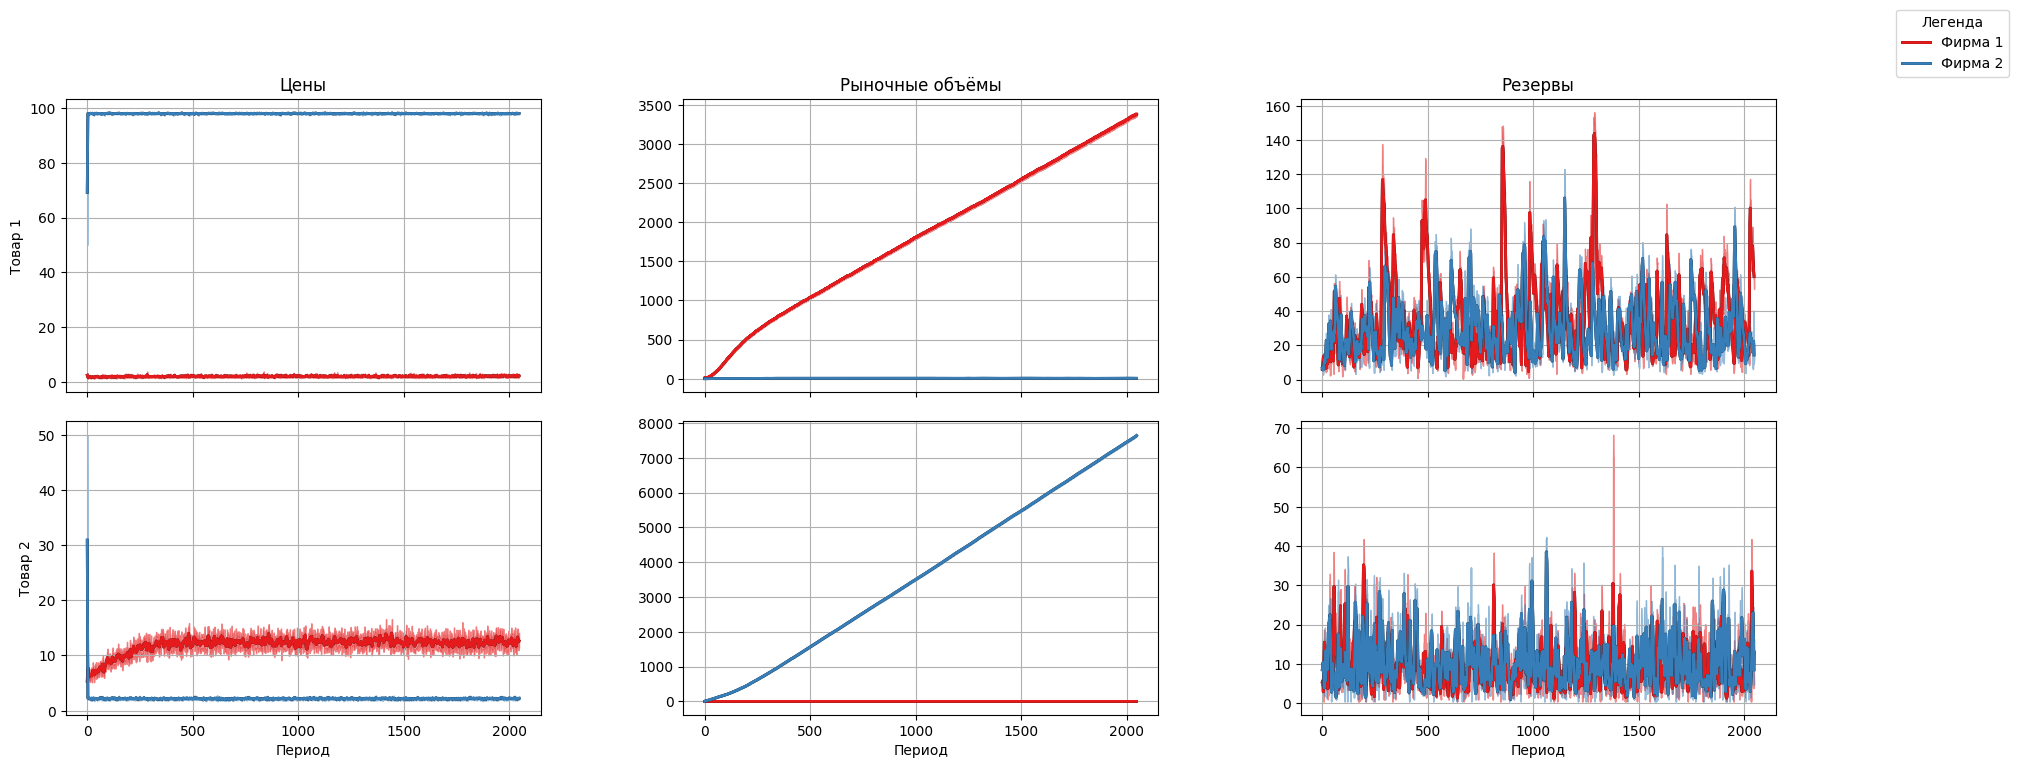

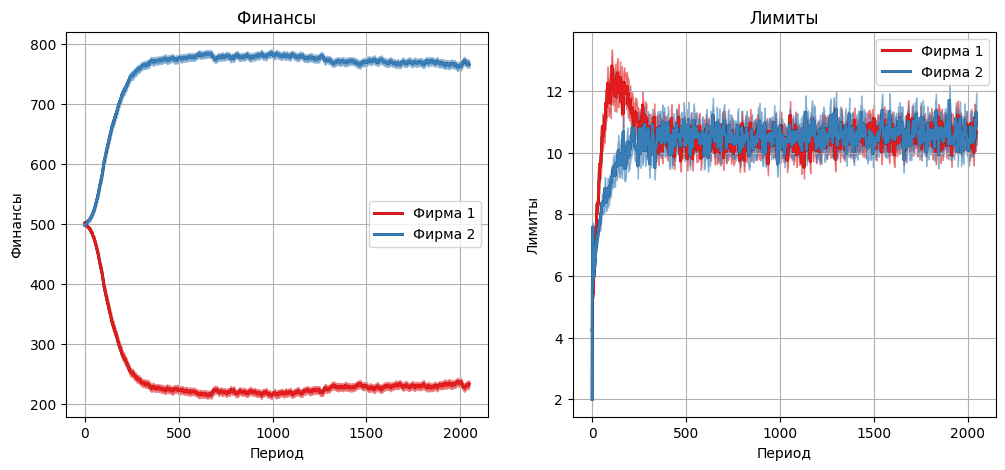

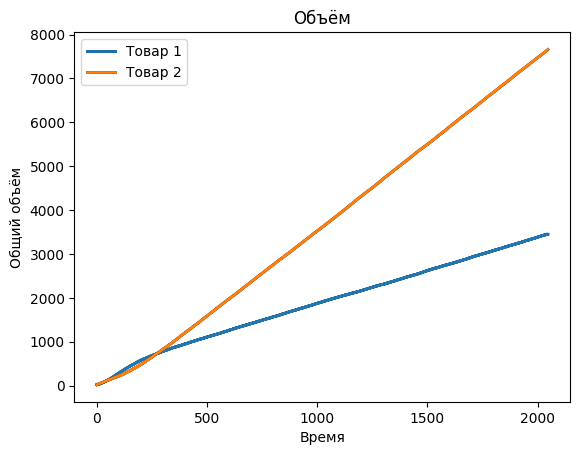

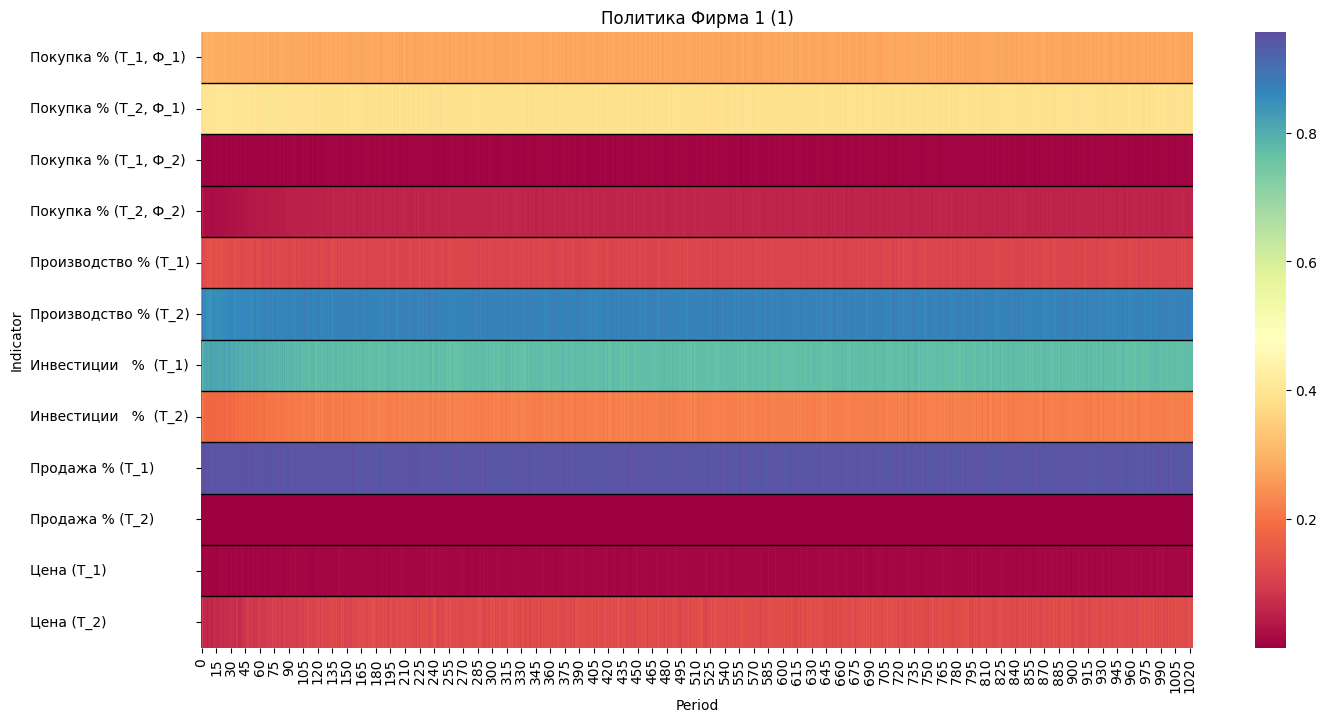

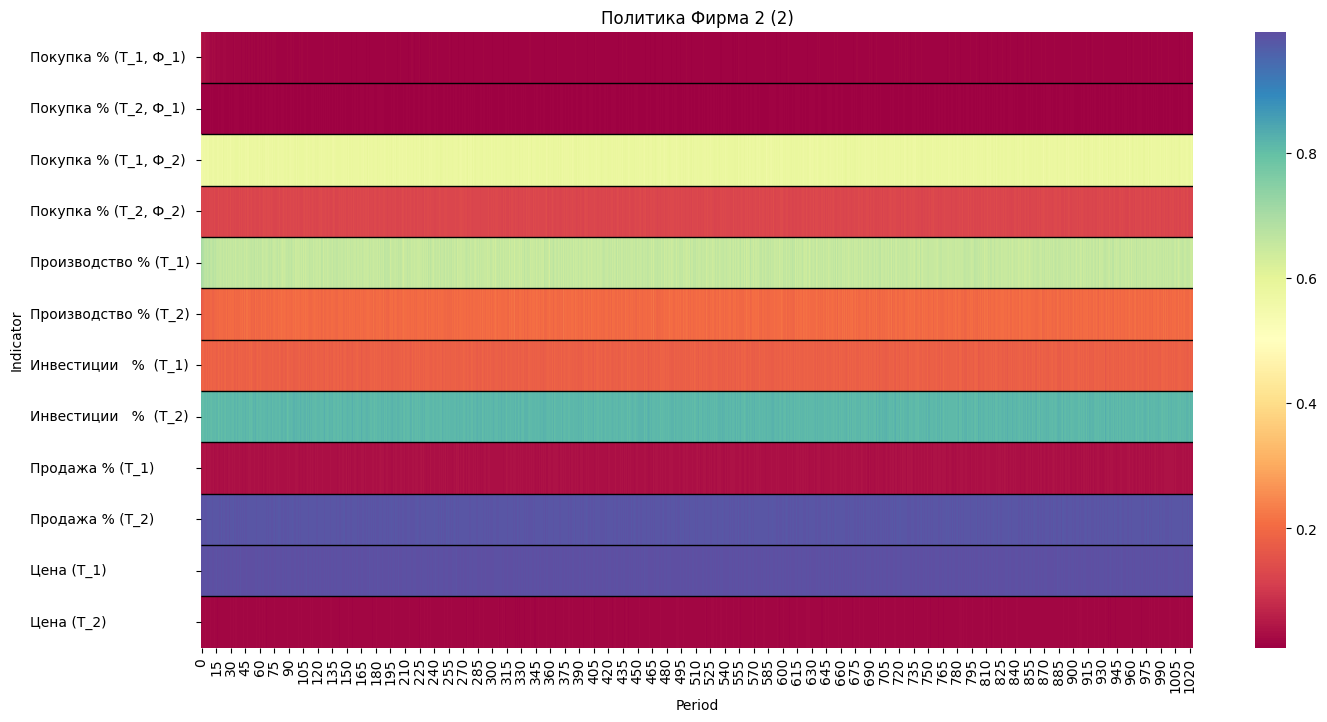

In [15]:
# Если симуляция просуществует дольше.
env.reset()
n_periods = 2048
for i in range(n_periods):
    env.step_and_record_batch(i % env.market.n_firms)
plot_environment_batch(env.state_history)
plot_volumes_batch(env.state_history)
plot_actions_batch(env.actions_history[0], 'Политика Фирма 1 (1)')
plot_actions_batch(env.actions_history[1], 'Политика Фирма 2 (2)')

# Эксперимент 6. 

Как в предыдущем, но порядок ходов перемешивается

1. Фирмы выставляют на продажу большую часть оставшихся резервов

2. Фирмы не очень охотно покупают у контрагента

3. По финансам резких проседаний нет. 

4. Одна из фирм держит максимальные цены на свою продукцию. 

5. Фирмы стараются держать резервы контрагентов. 


In [16]:
torch.manual_seed(777)
env = BatchedEnvironment(market_kwargs,
                         BetaPolicyNetwork,
                         prod_functions,
                         invest_functions=invest_functions,
                         target='finance',
                         production_reg=15,
                         **env_kwargs
                        )
trainer = TrainerPPO(env, **trainer_kwargs)

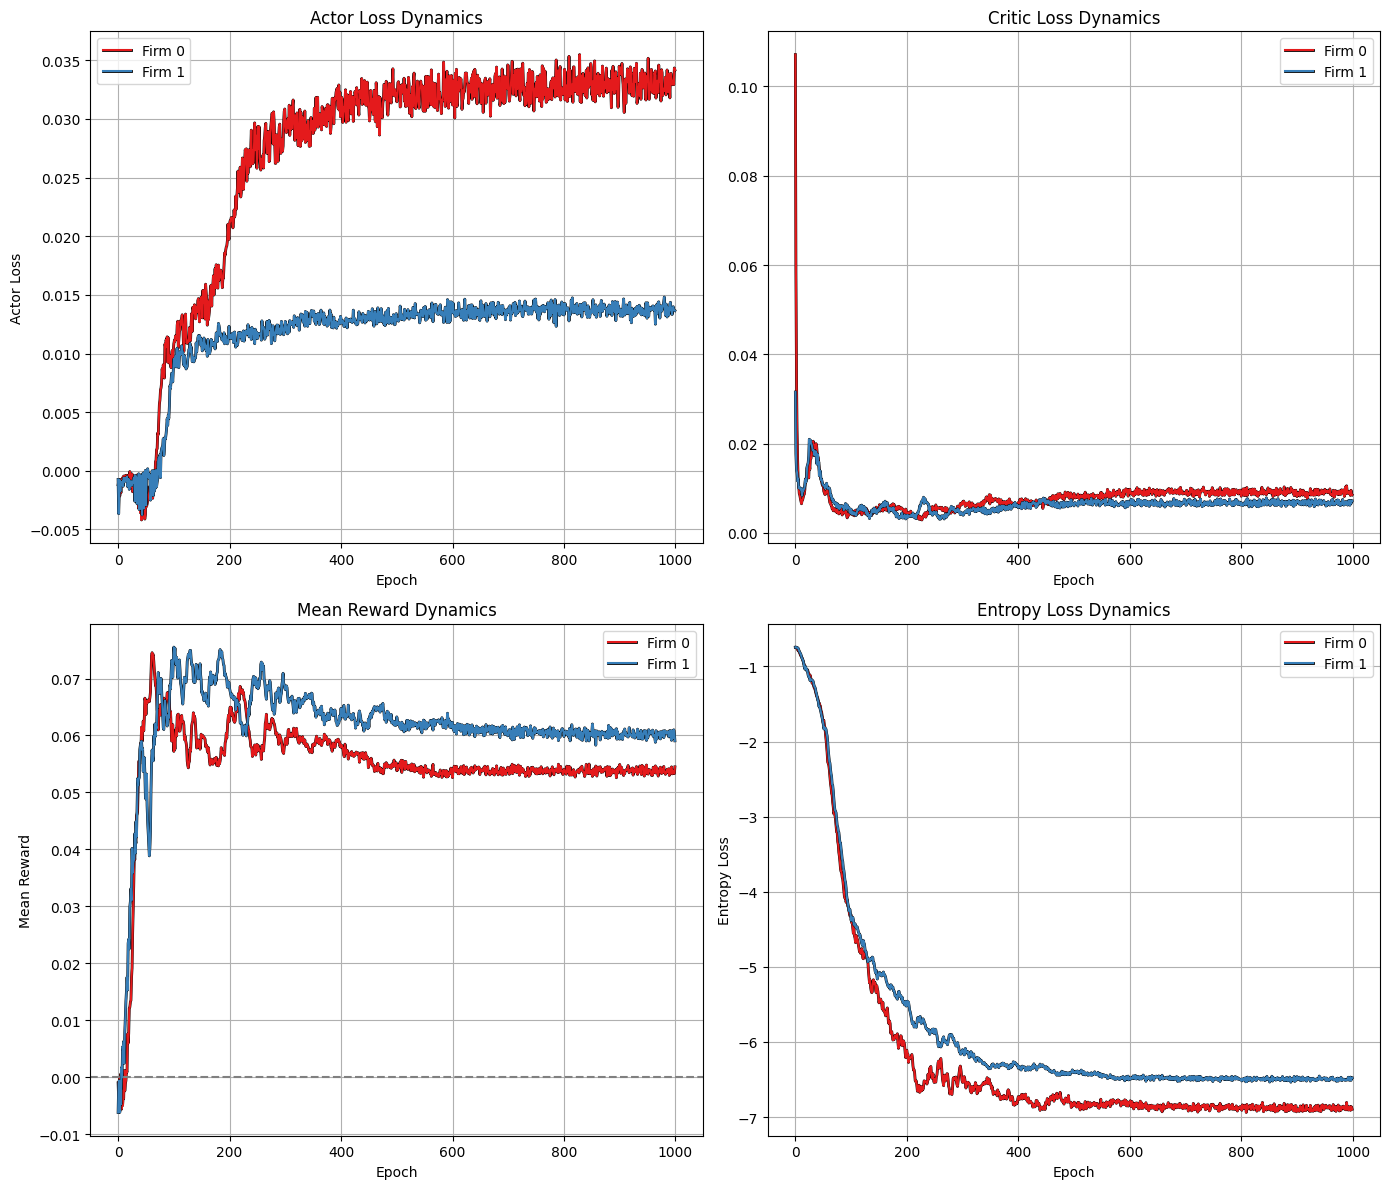

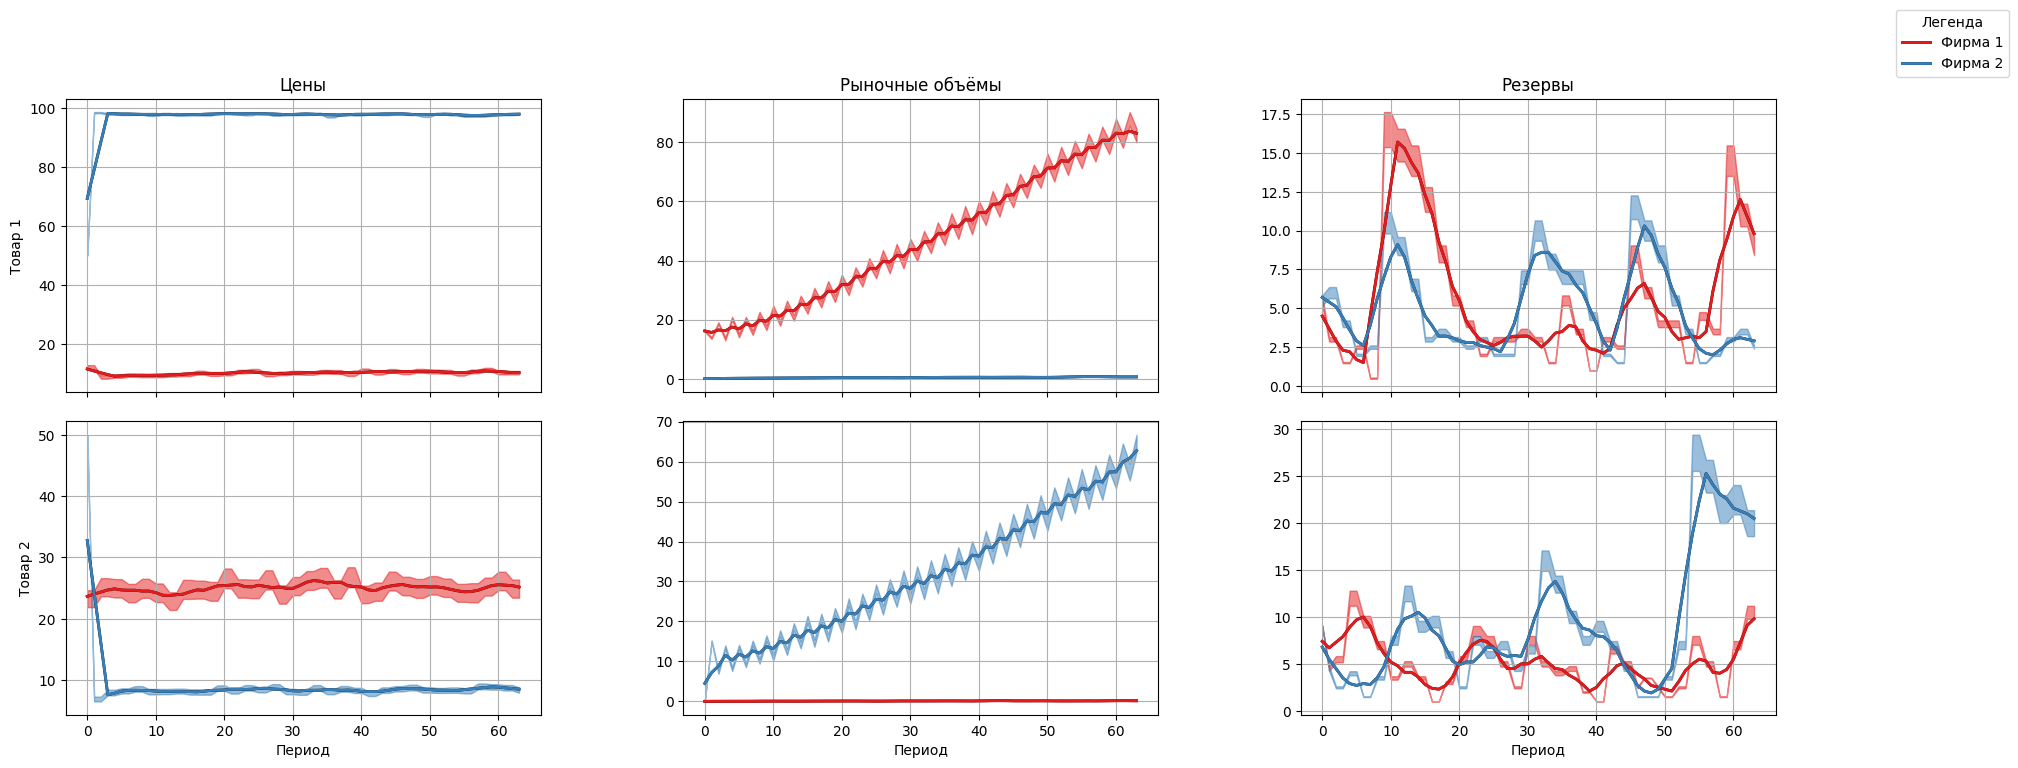

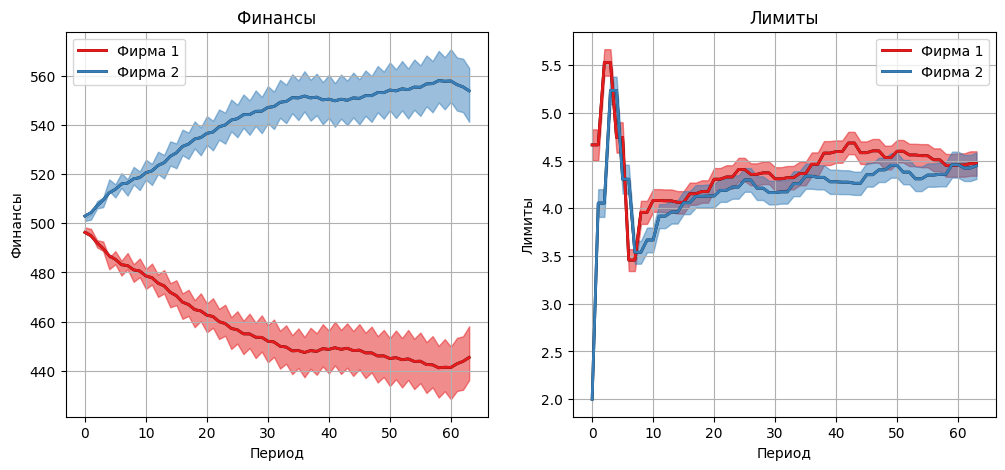

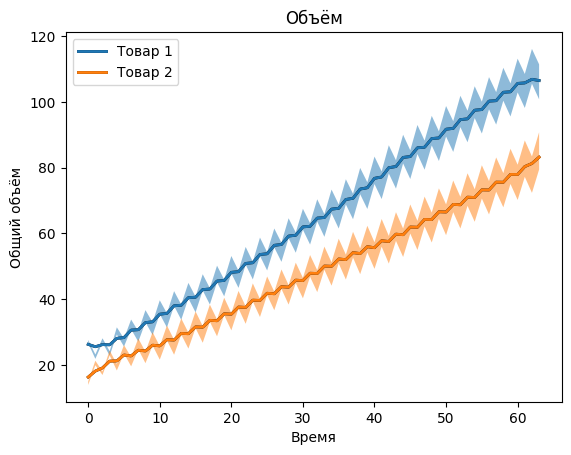

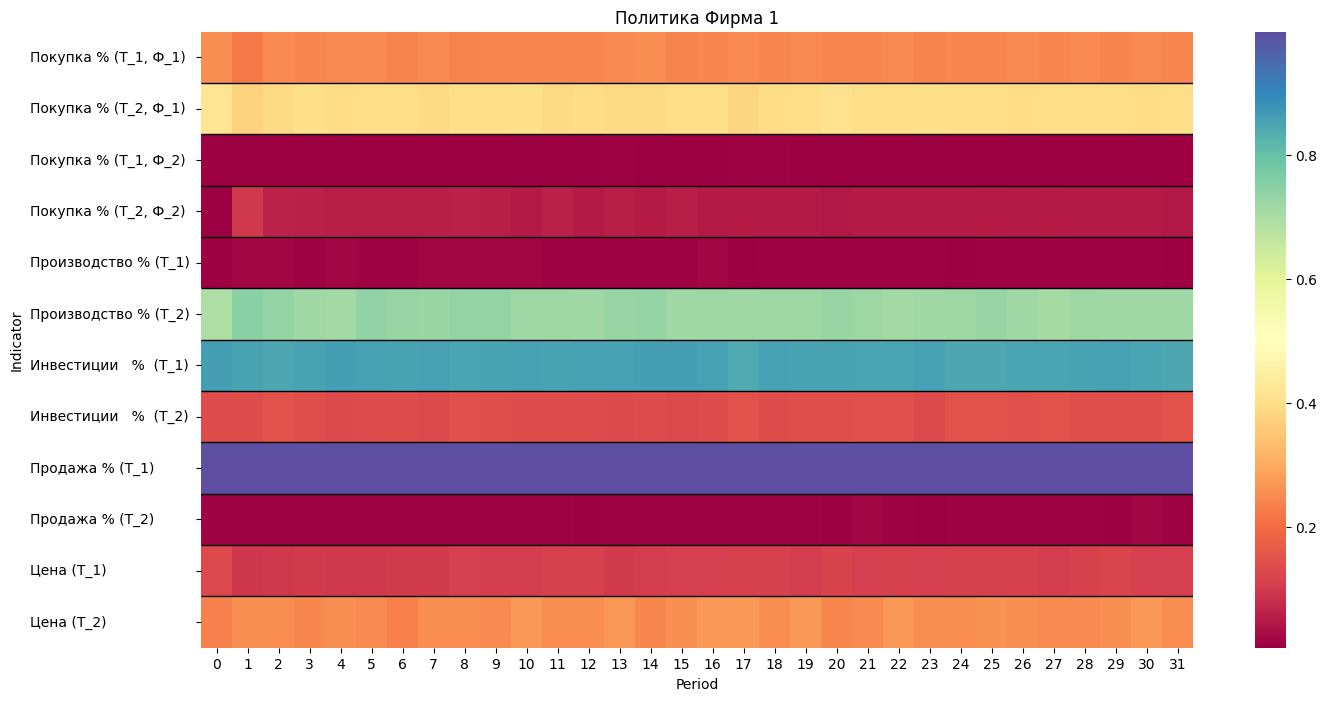

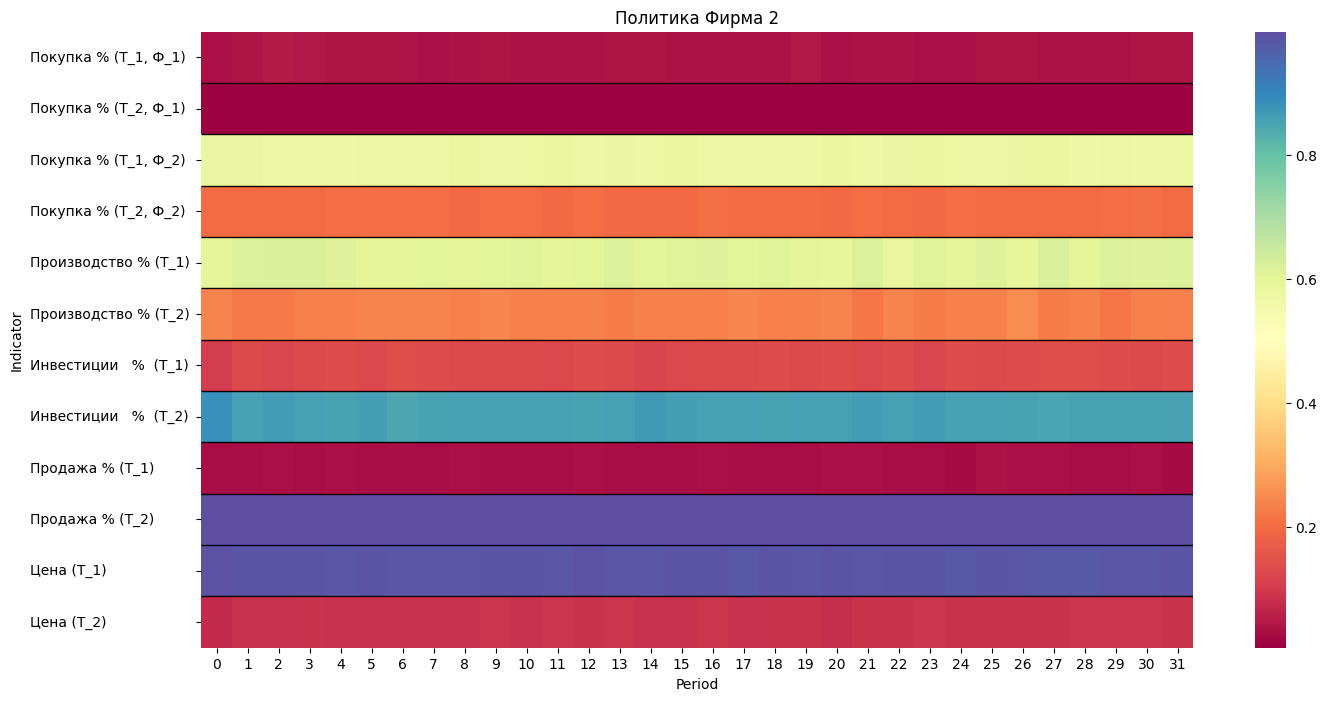

In [17]:
trainer.train(**train_kwargs, shuffle_order=True)
env.reset()
n_periods = 64
for i in range(n_periods):
    env.step_and_record_batch(i % env.market.n_firms)
plot_environment_batch(env.state_history)
plot_volumes_batch(env.state_history)
plot_actions_batch(env.actions_history[0], 'Политика Фирма 1')
plot_actions_batch(env.actions_history[1], 'Политика Фирма 2')

# Монопольная vs Немонопольная отрасль

Перемешивание ходов есть.

3 фирмы vs Монополия. Эта модель сошлась к следующему состоянию:

1. Контрагенты монополии - доноры.

2. Производство растёт, но примерно в два раза медленнее, чем в модели с двумя фирмами-контрагентами, ориентированными на производство (начальные запасы там были в два раза меньше).

3. У фирм из одной отрасли выработались разные политики

4. Монополия старается накапливать резервы отрасли-контрагента. Это, скорее всего, мотивировано заботой о дисконтированном производстве. 

In [18]:
# Производственные функции
prod_functions = [
    BatchedLeontief(torch.tensor([0, 1]), torch.tensor([2, 0]), device=device),  # 0 товара А + 1 товар  Б => 2 товара А.
    BatchedLeontief(torch.tensor([0, 1]), torch.tensor([2, 0]), device=device),  # 0 товара А + 1 товар  Б => 2 товара А.
    BatchedLeontief(torch.tensor([0, 1]), torch.tensor([2, 0]), device=device),  # 0 товара А + 1 товар  Б => 2 товара А.
    BatchedLeontief(torch.tensor([1, 0]), torch.tensor([0, 2]), device=device),  # 1 товара А + 0 товара Б => 2 товара Б 
]

# Инвестиционные функции
invest_functions = [
    BatchedLeontief(torch.tensor([1, 1]), torch.tensor(2), device=device),
    BatchedLeontief(torch.tensor([1, 1]), torch.tensor(2), device=device),
    BatchedLeontief(torch.tensor([1, 1]), torch.tensor(2), device=device),
    BatchedLeontief(torch.tensor([1, 1]), torch.tensor(2), device=device),
]

torch.manual_seed(777)
env = BatchedEnvironment(market_kwargs,
                         BetaPolicyNetwork,
                         prod_functions,
                         invest_functions=invest_functions,
                         target='finance',
                         production_reg=10,
                         **env_kwargs
                        )
trainer = TrainerPPO(env, **trainer_kwargs)

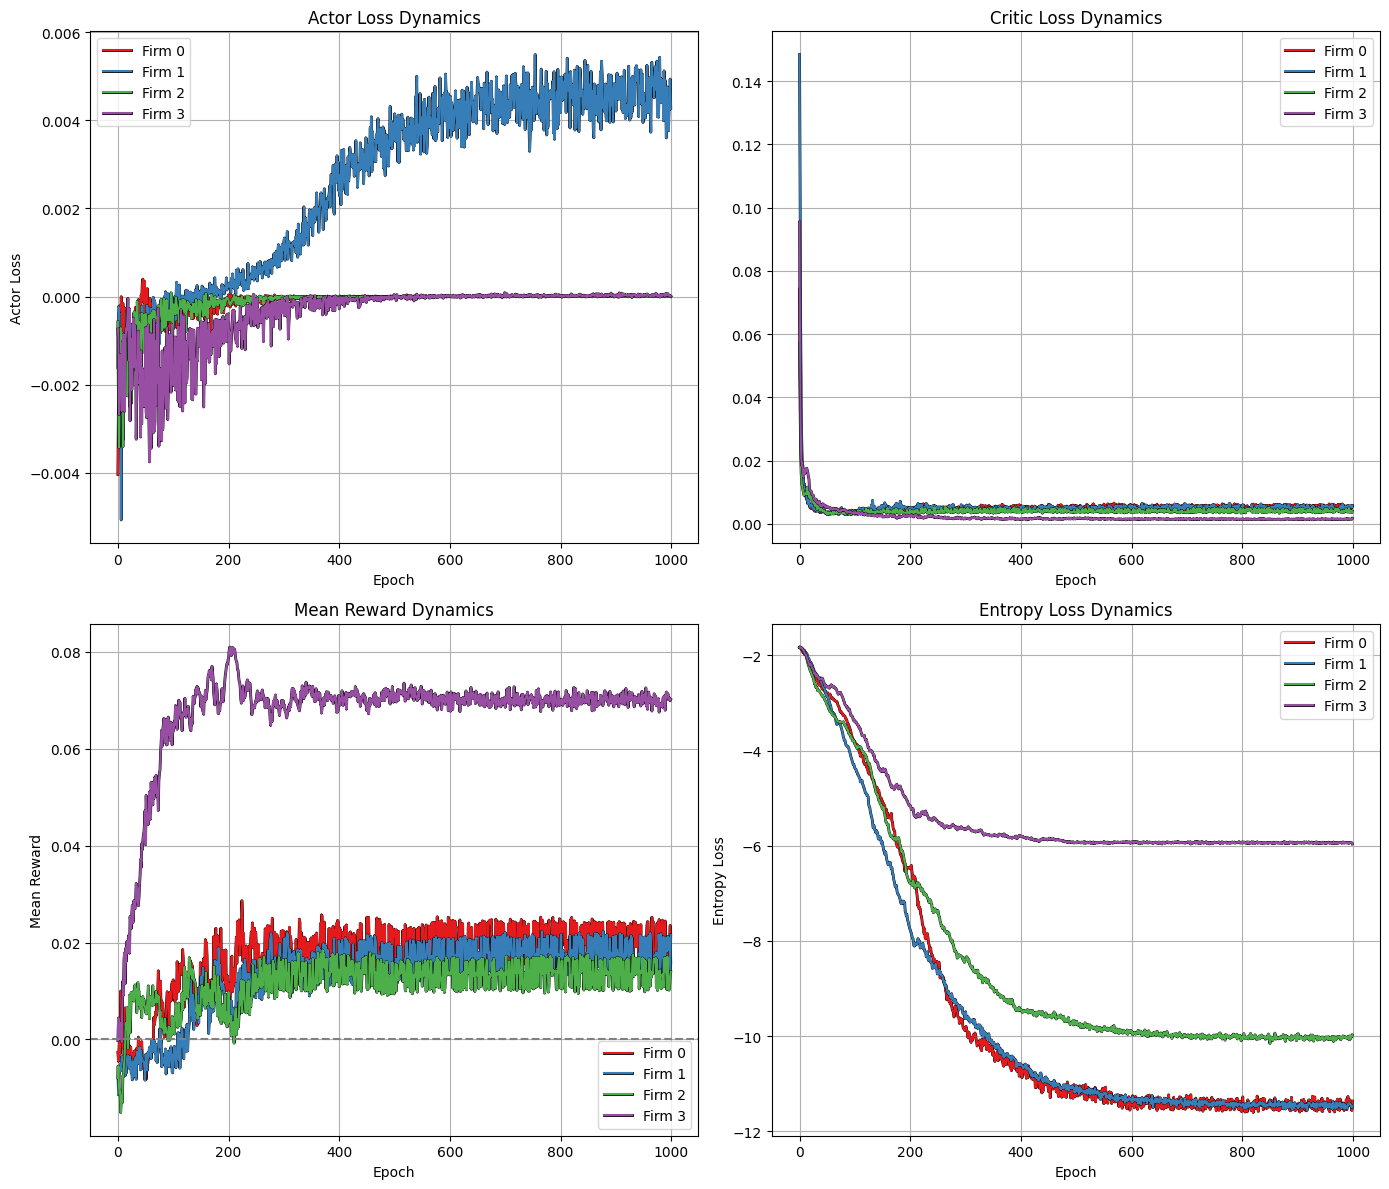

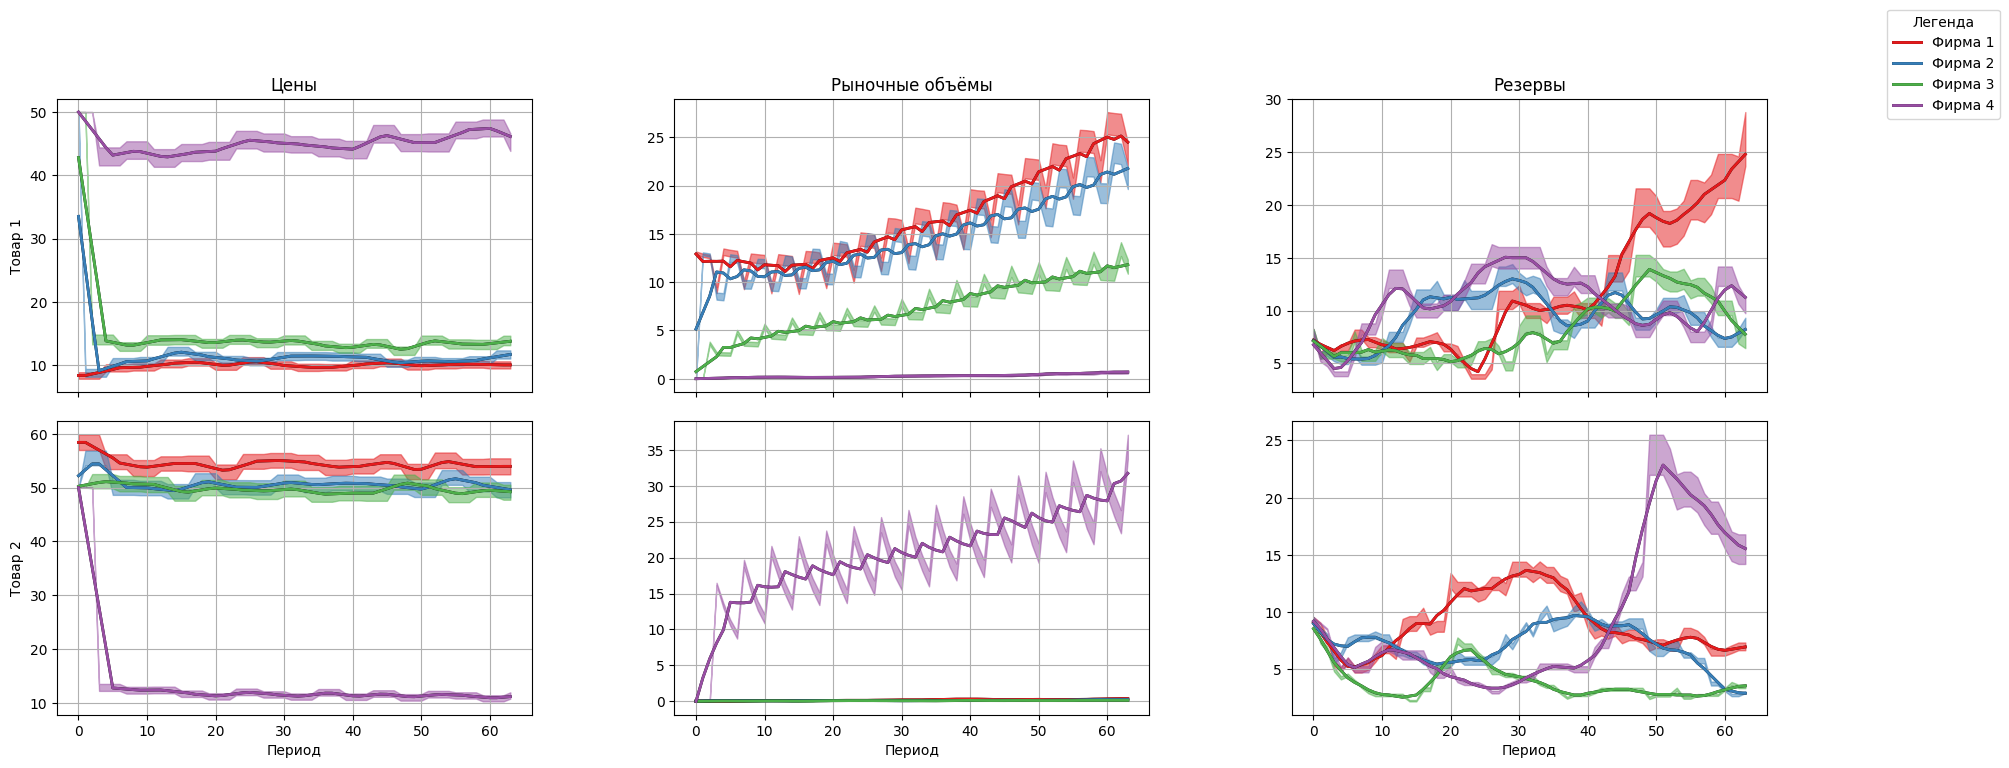

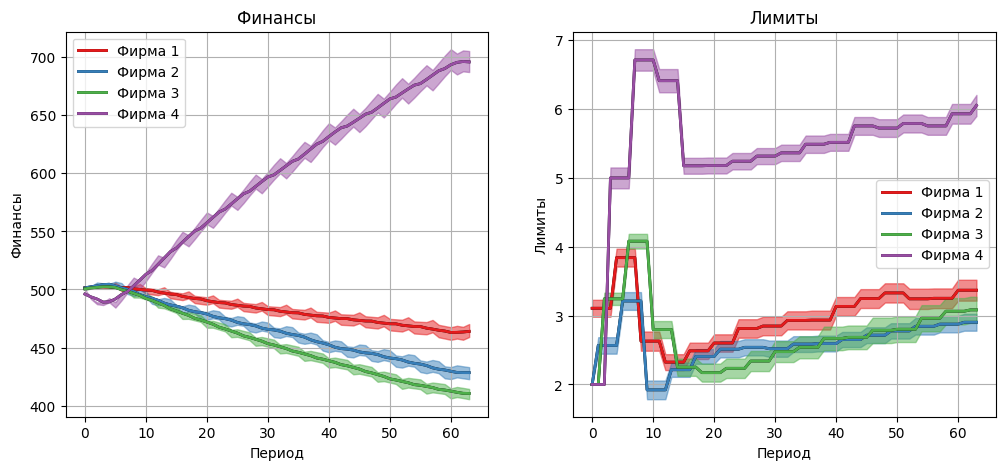

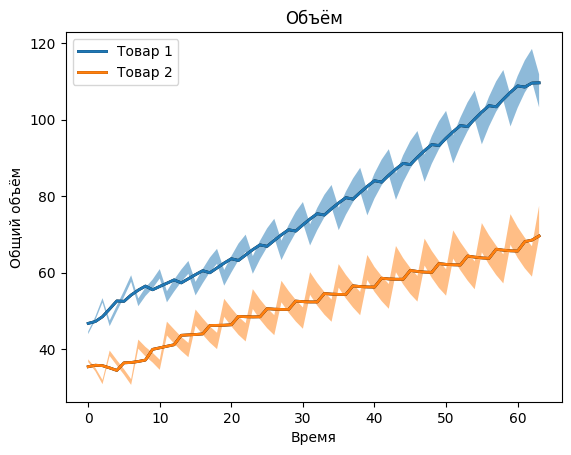

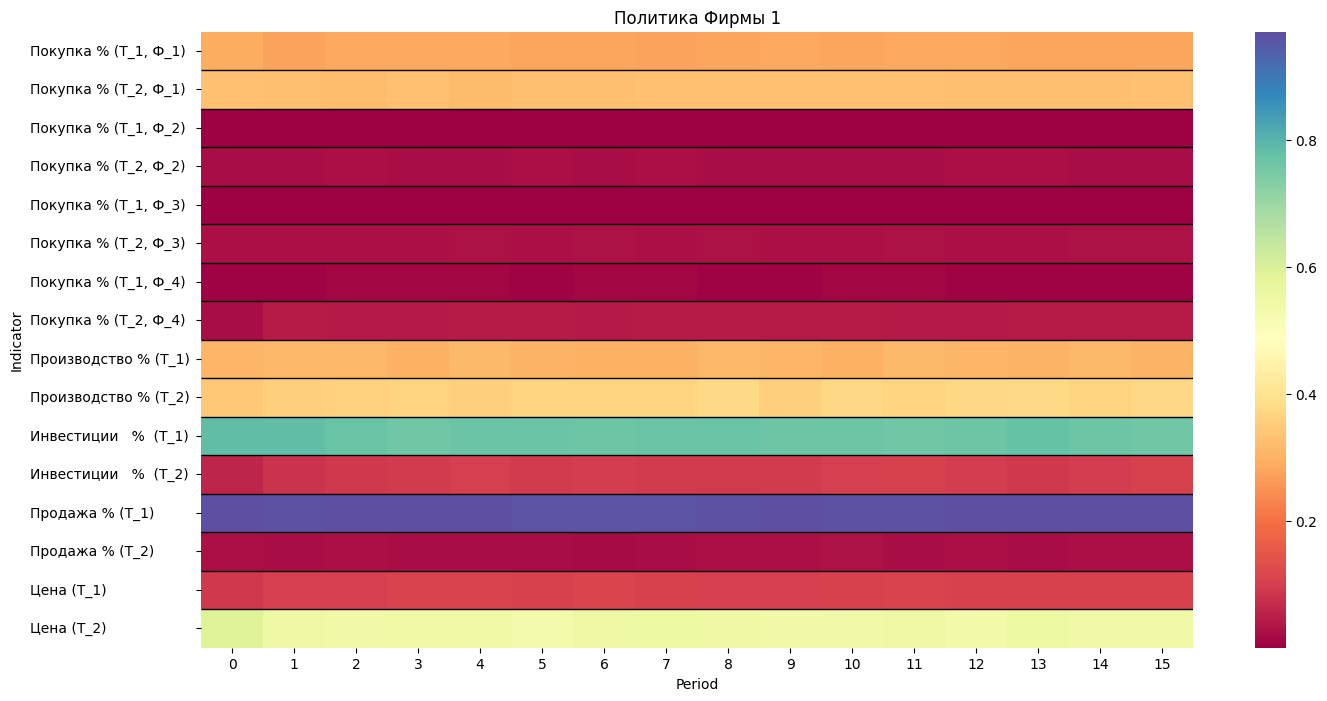

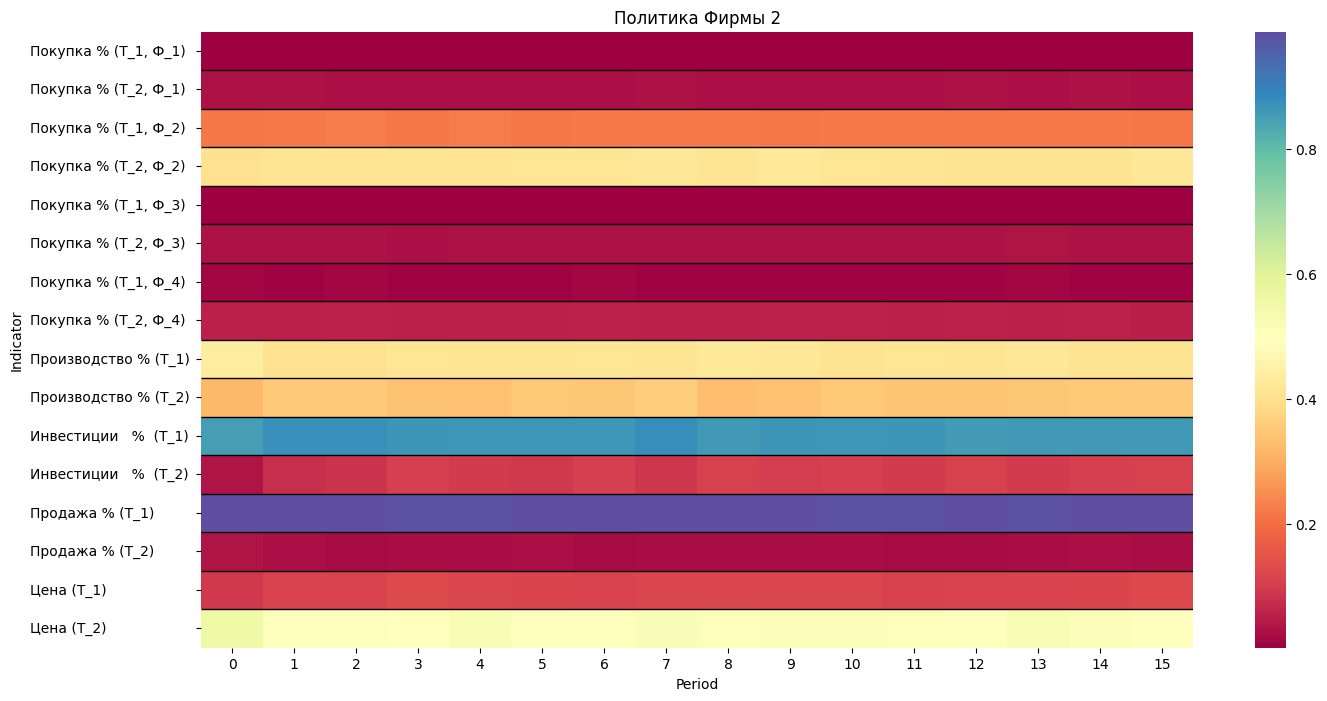

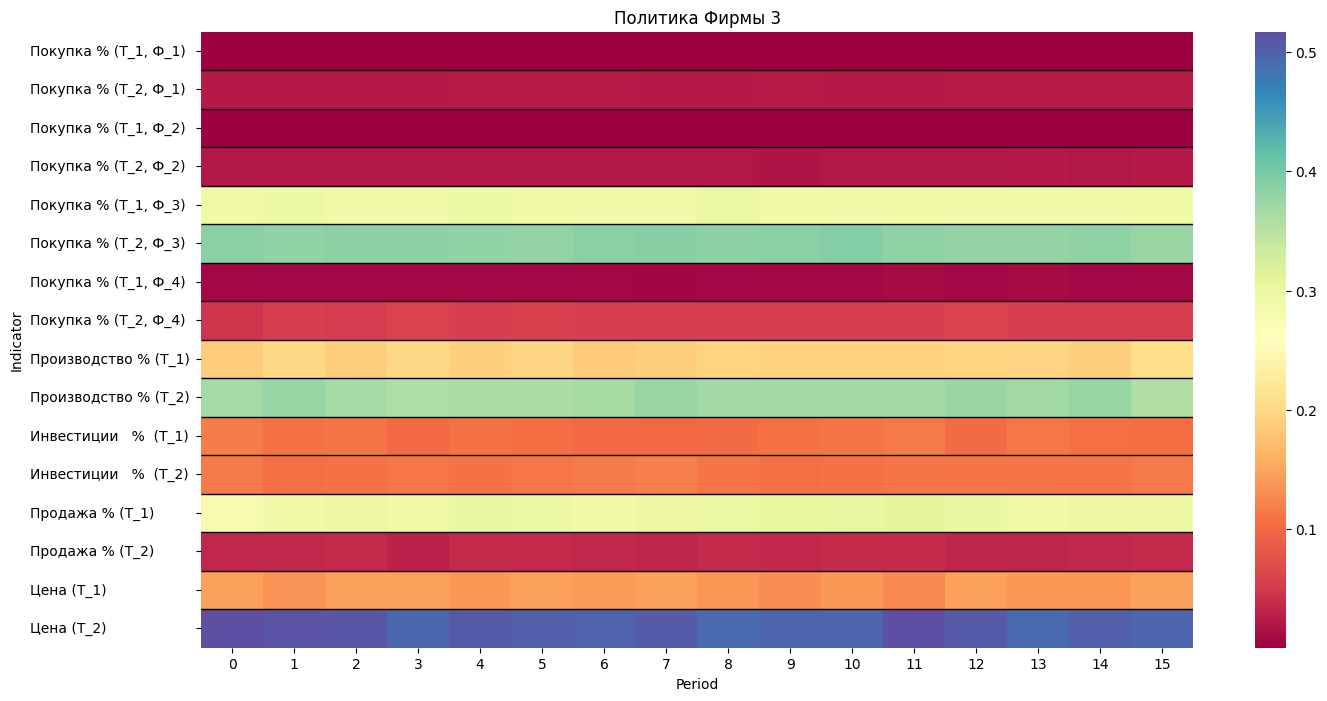

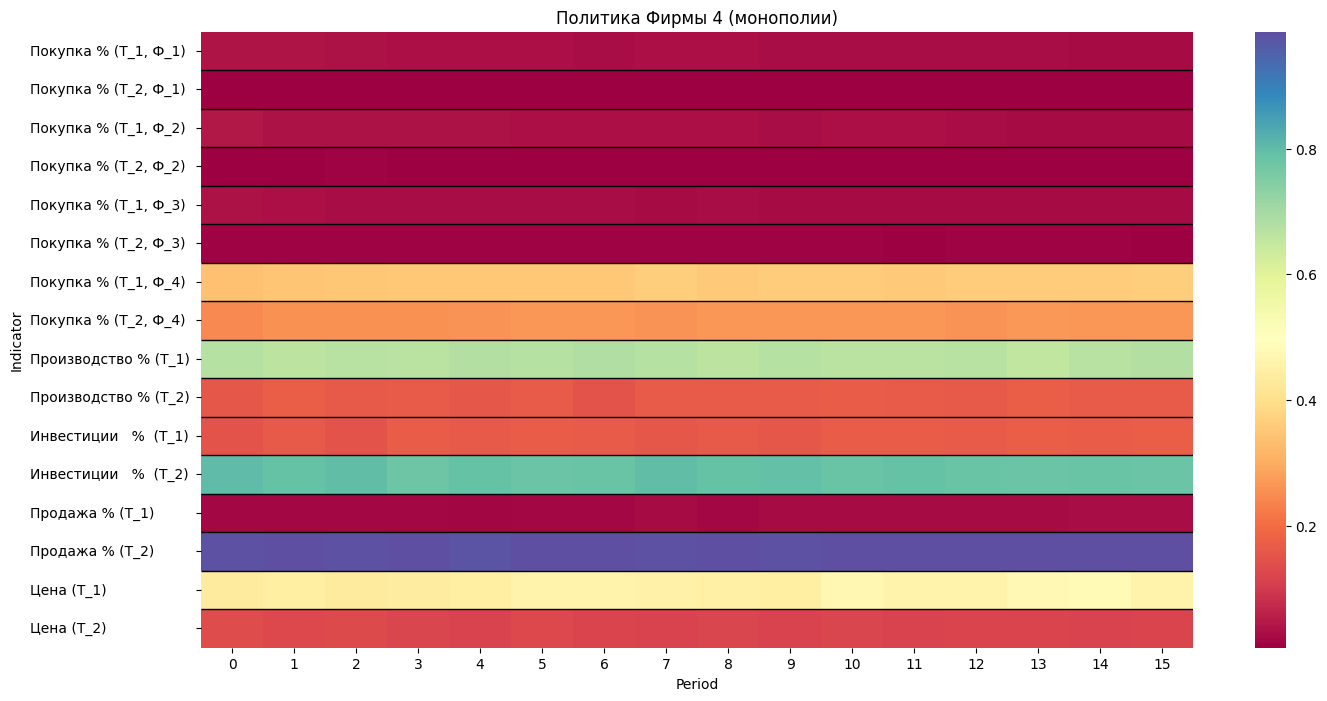

In [19]:
trainer.train(**train_kwargs, shuffle_order=True)
env.reset()
n_periods = 64
for i in range(n_periods):
    env.step_and_record_batch(i % env.market.n_firms)
plot_environment_batch(env.state_history)
plot_volumes_batch(env.state_history)
plot_actions_batch(env.actions_history[0], 'Политика Фирмы 1')
plot_actions_batch(env.actions_history[1], 'Политика Фирмы 2')
plot_actions_batch(env.actions_history[2], 'Политика Фирмы 3')
plot_actions_batch(env.actions_history[3], 'Политика Фирмы 4 (монополии)')

# Три отрасли

Основной капитал производит только одна из трёх отраслей. Фирмы заботятся только о производстве. 



In [20]:
# Производственные функции
prod_functions = [
    BatchedLeontief(torch.tensor([0, 1, 1]), torch.tensor([3, 0, 0]), device=device),  # 0 товара А + 1 товар  Б => 2 товара А.
    BatchedLeontief(torch.tensor([1, 0, 1]), torch.tensor([0, 3, 0]), device=device),  # 0 товара А + 1 товар  Б => 2 товара А.
    BatchedLeontief(torch.tensor([1, 1, 0]), torch.tensor([0, 0, 3]), device=device),  # 0 товара А + 1 товар  Б => 2 товара А.
]

# Инвестиционные функции
invest_functions = [
    BatchedLeontief(torch.tensor([0, 0, 2]), torch.tensor(2), device=device),
    BatchedLeontief(torch.tensor([0, 0, 2]), torch.tensor(2), device=device),
    BatchedLeontief(torch.tensor([0, 0, 2]), torch.tensor(2), device=device),
]

torch.manual_seed(777)
env = BatchedEnvironment(market_kwargs,
                         BetaPolicyNetwork,
                         prod_functions,
                         invest_functions=invest_functions,
                         target='production',
                         # production_reg=10,
                         **env_kwargs
                        )
trainer = TrainerPPO(env, **trainer_kwargs)

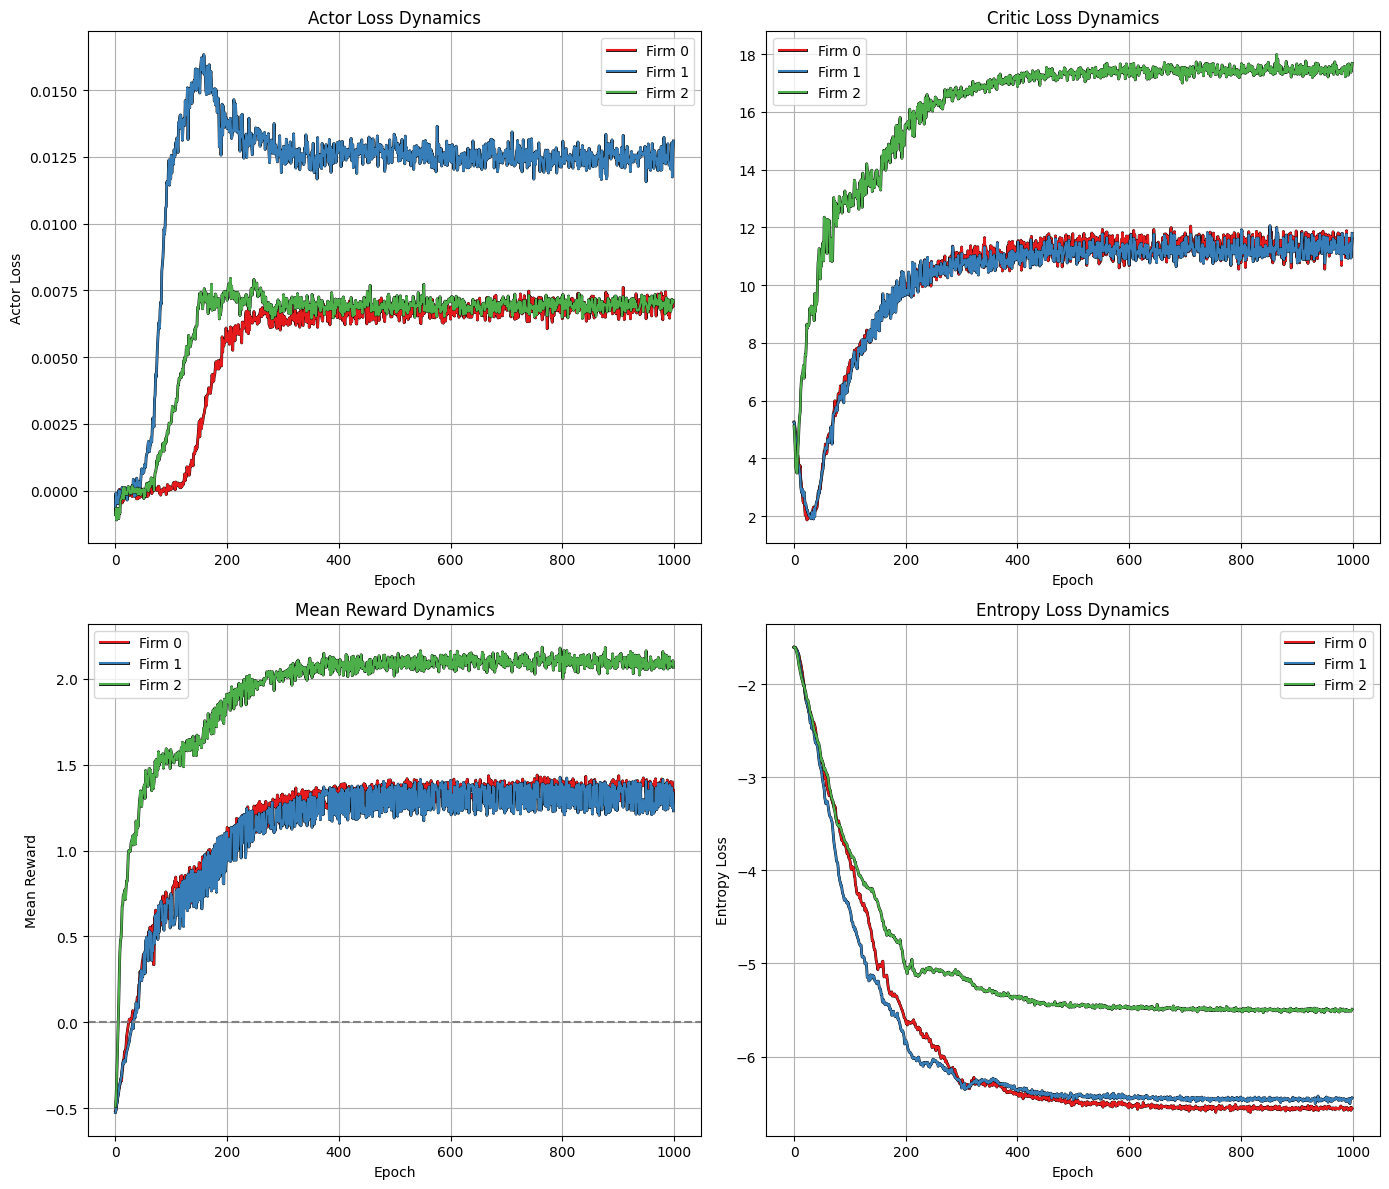

In [21]:
trainer.train(**train_kwargs, shuffle_order=True)

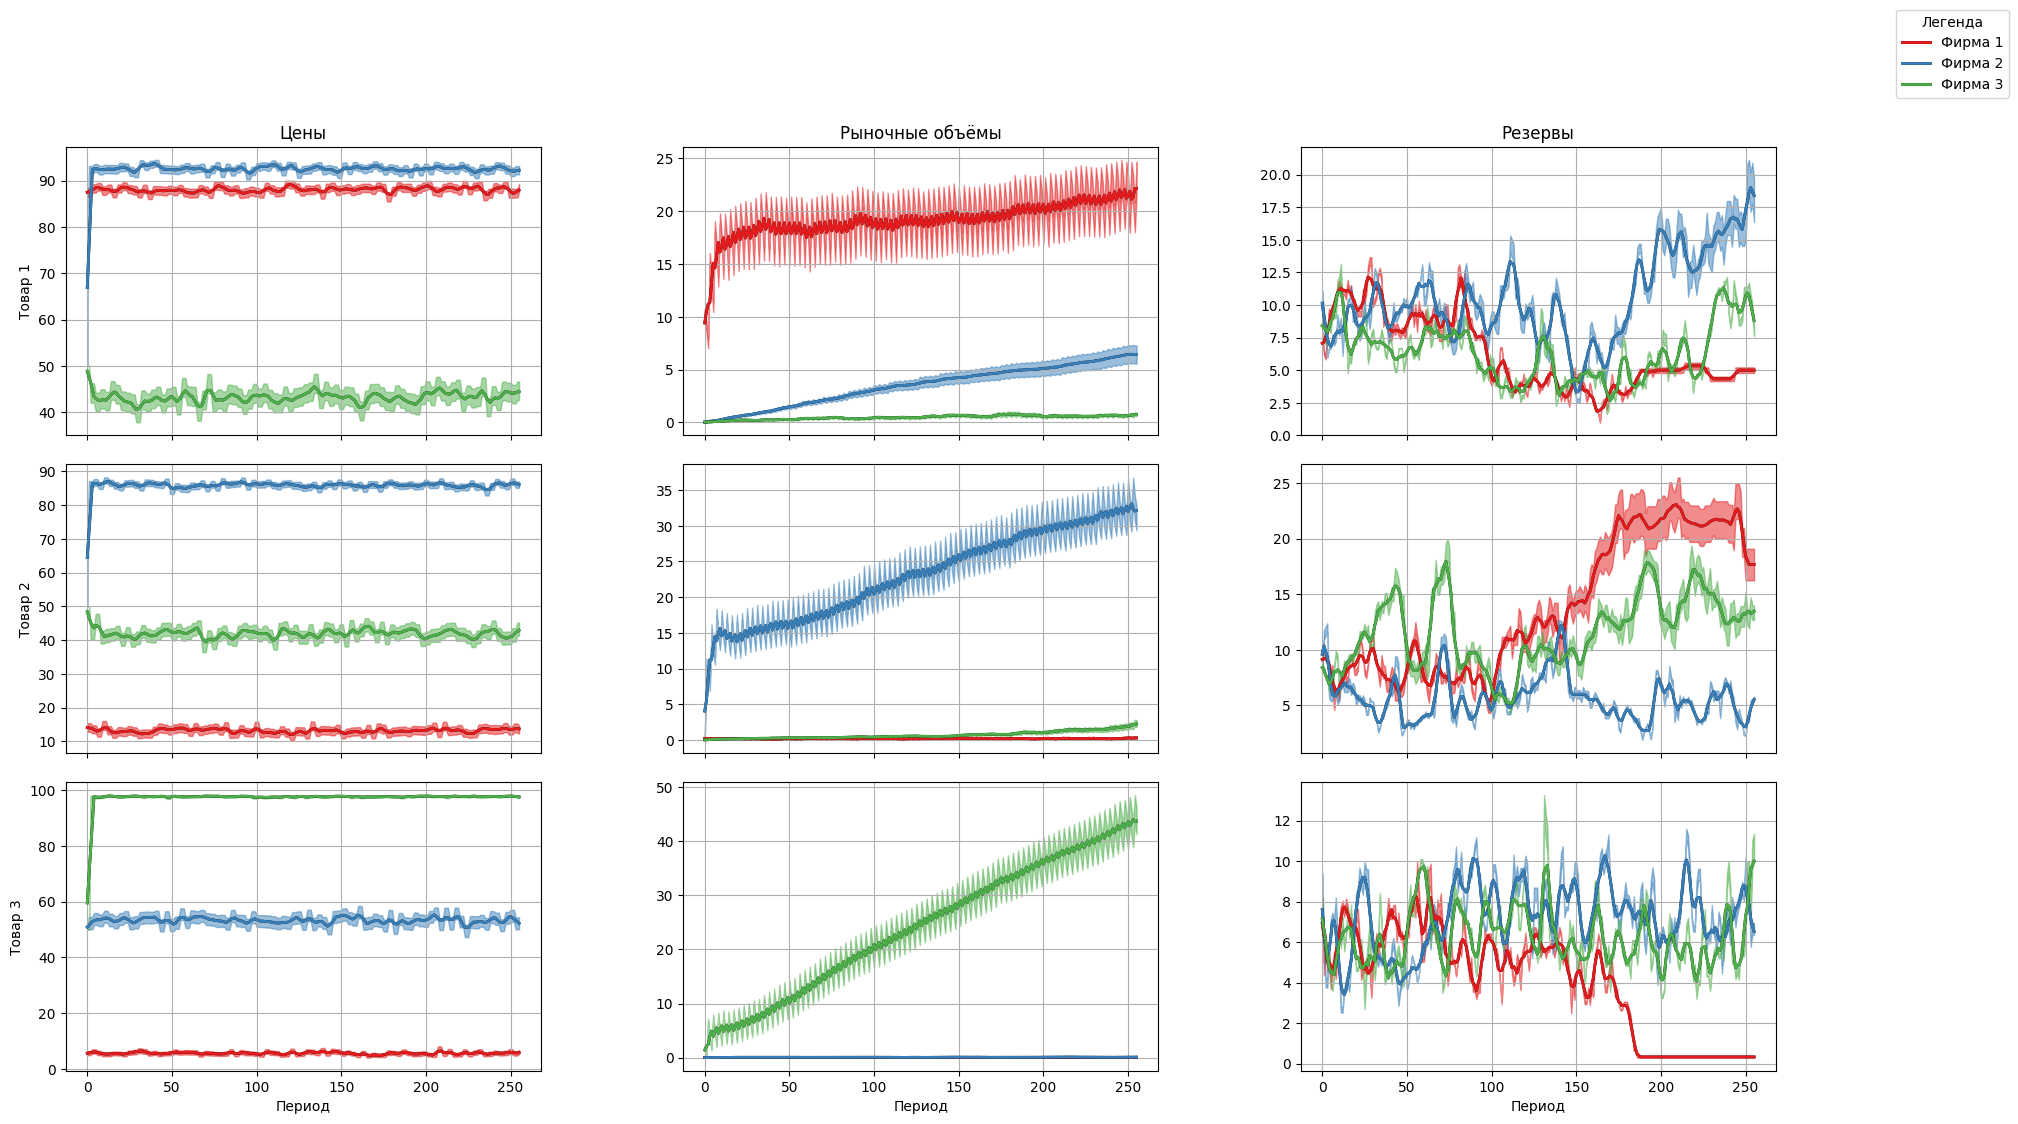

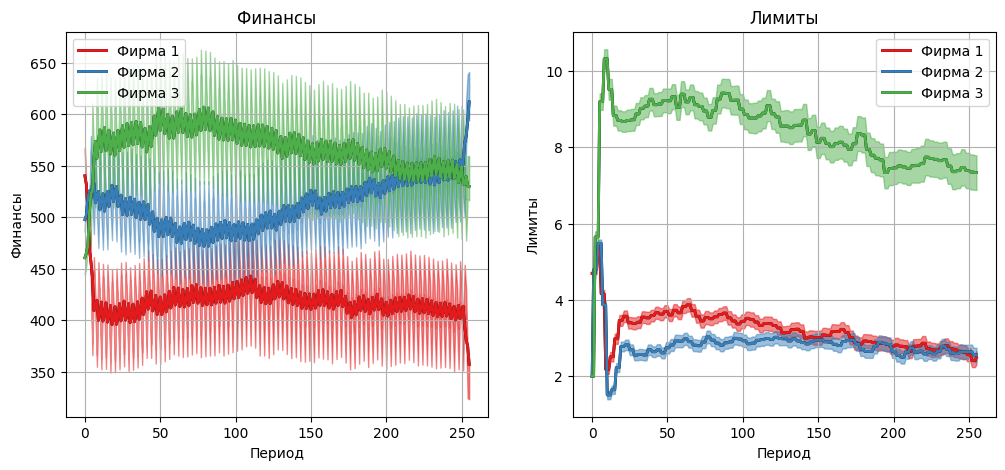

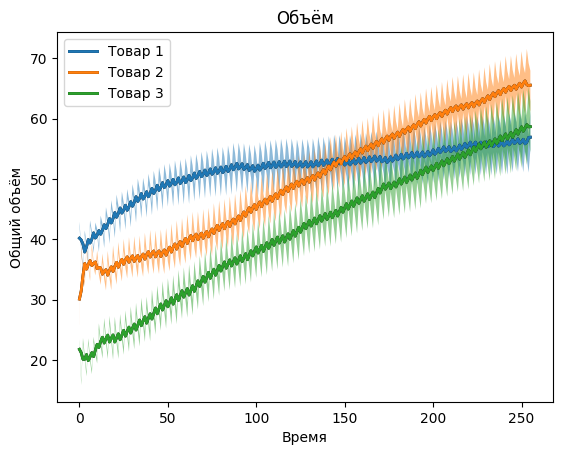

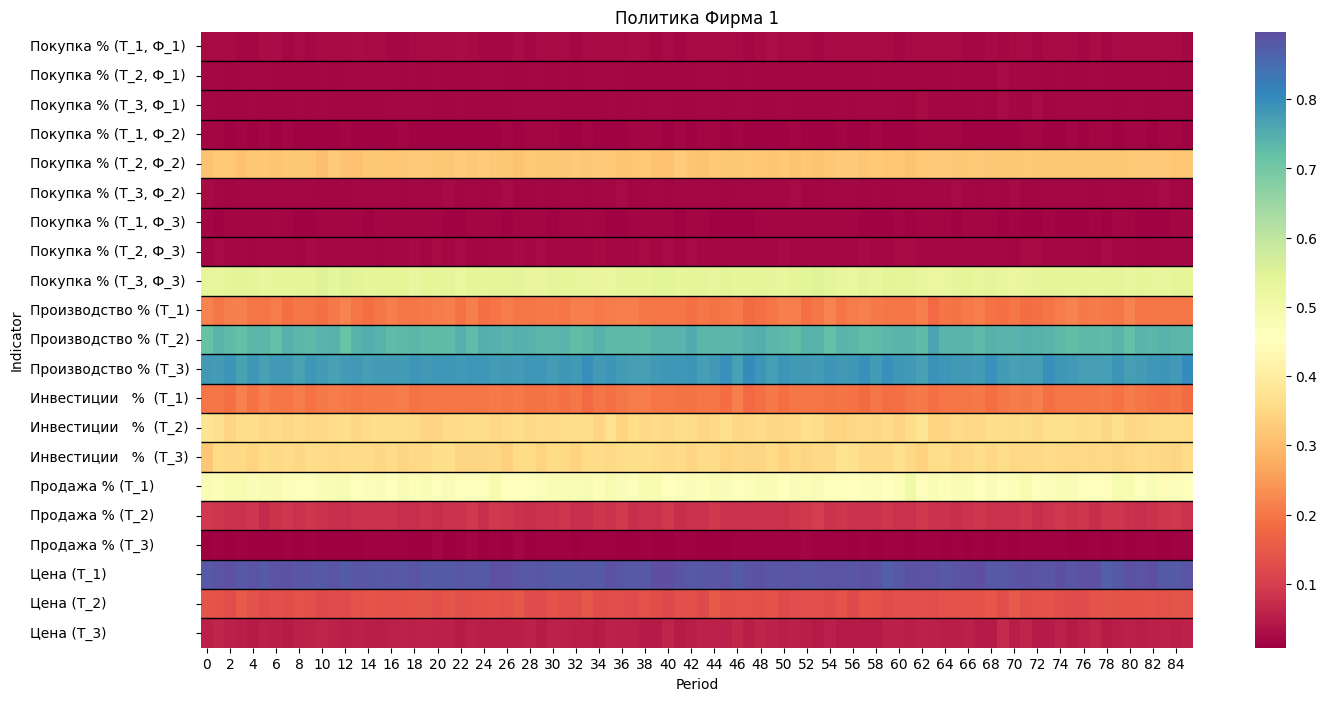

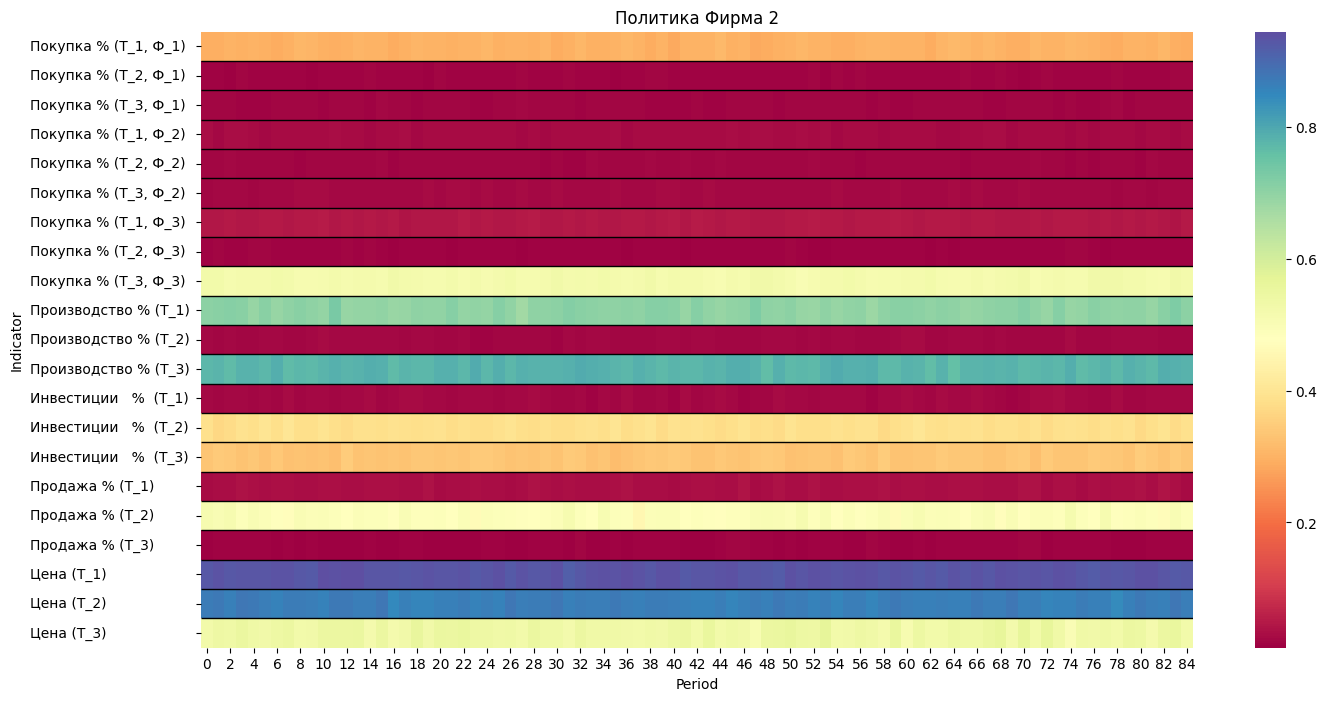

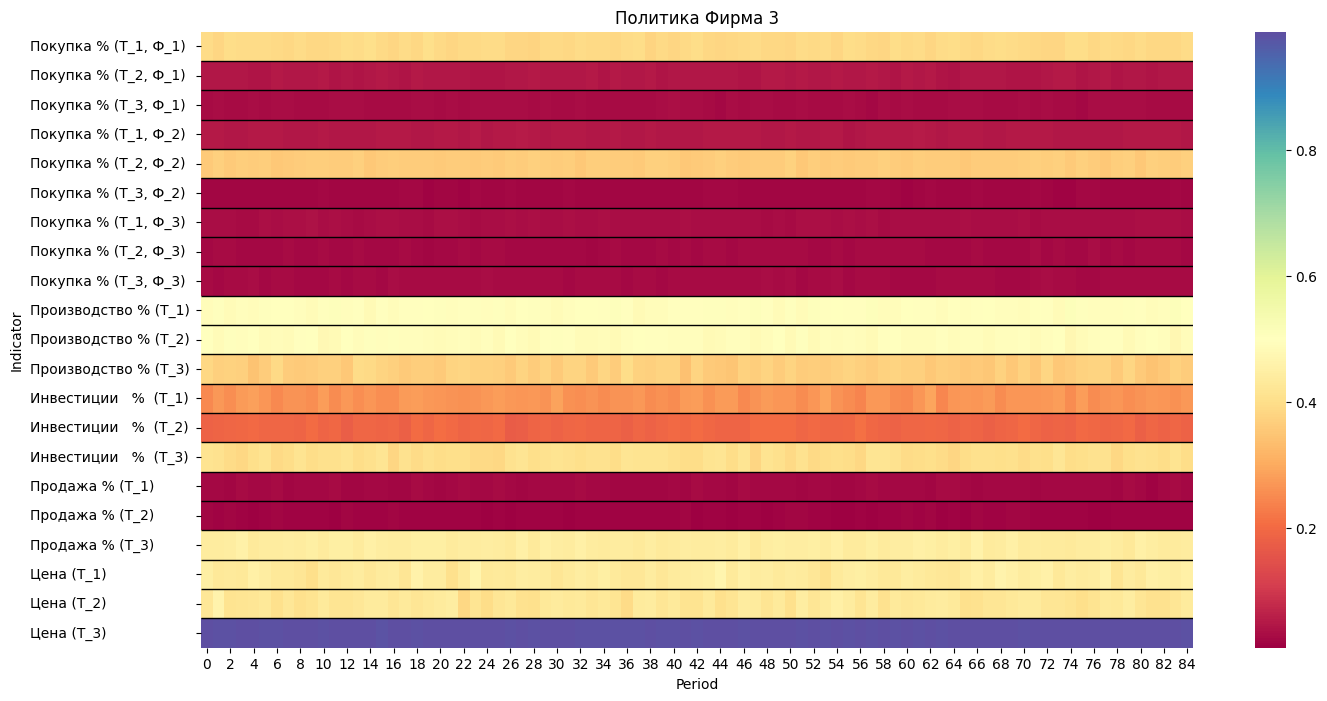

In [22]:
env.reset()
n_periods = 256
for i in range(n_periods):
    env.step_and_record_batch(i % env.market.n_firms)
plot_environment_batch(env.state_history)
plot_volumes_batch(env.state_history)
plot_actions_batch(env.actions_history[0], 'Политика Фирма 1')
plot_actions_batch(env.actions_history[1], 'Политика Фирма 2')
plot_actions_batch(env.actions_history[2], 'Политика Фирма 3')

# Три отрасли (+ другой способ менять цены)

Основной капитал производит только одна из трёх отраслей. Фирмы заботятся только о производстве.
Фирмы назначают процентные изменения своих цен. Интервал изменений: [-50%, +100%]. Функция подобрана так, чтобы для $x \in [0, 1]$:

$$\begin{cases}
f(x) \cdot f(1-x) \approx 1\\
f(0.0) = 0.5 \\
f(0.5) = 1.0 \\
f(1.0) = 2.0 \\
\end{cases}$$



In [23]:
# Производственные функции
prod_functions = [
    BatchedLeontief(torch.tensor([0, 1, 1]), torch.tensor([3, 0, 0]), device=device),  # 0 товара А + 1 товар  Б => 2 товара А.
    BatchedLeontief(torch.tensor([1, 0, 1]), torch.tensor([0, 3, 0]), device=device),  # 0 товара А + 1 товар  Б => 2 товара А.
    BatchedLeontief(torch.tensor([1, 1, 0]), torch.tensor([0, 0, 3]), device=device),  # 0 товара А + 1 товар  Б => 2 товара А.
]

# Инвестиционные функции
invest_functions = [
    BatchedLeontief(torch.tensor([0, 0, 2]), torch.tensor(2), device=device),
    BatchedLeontief(torch.tensor([0, 0, 2]), torch.tensor(2), device=device),
    BatchedLeontief(torch.tensor([0, 0, 2]), torch.tensor(2), device=device),
]

torch.manual_seed(123)
env = BatchedEnvironment(market_kwargs,
                         BetaPolicyNetwork,
                         prod_functions,
                         invest_functions=invest_functions,
                         percent_prices=True, 
                         target='production',
                         # production_reg=10,
                         **env_kwargs
                        )
trainer = TrainerPPO(env, **trainer_kwargs)

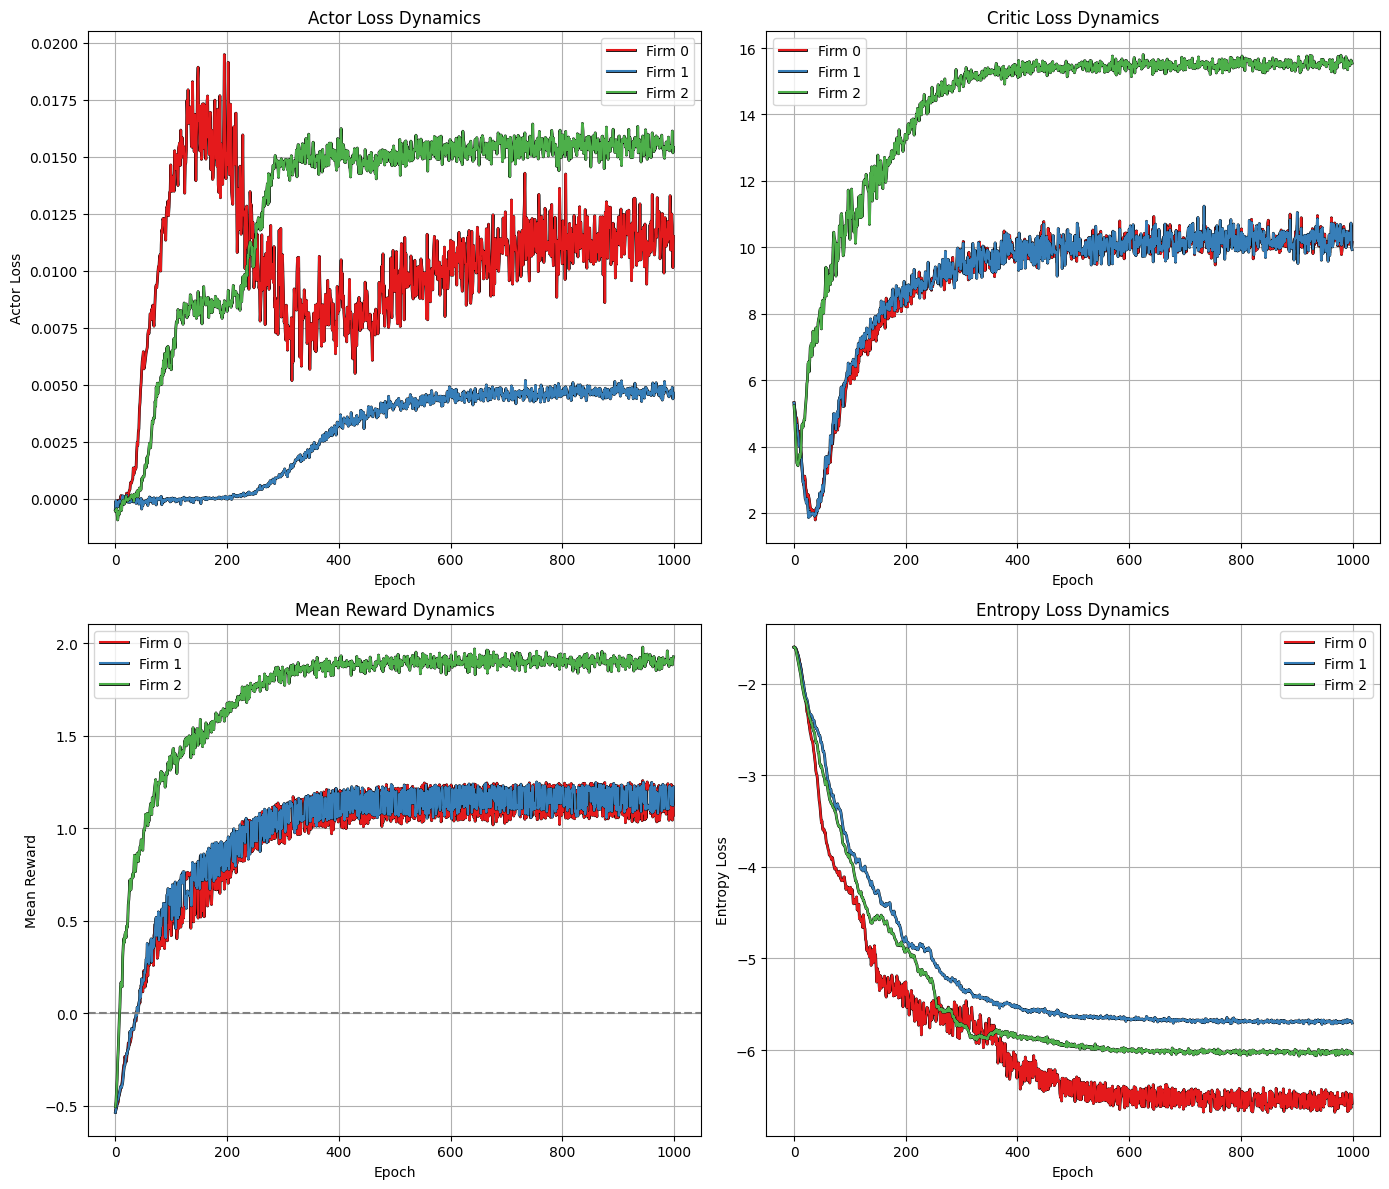

In [24]:
trainer.train(**train_kwargs, shuffle_order=True)


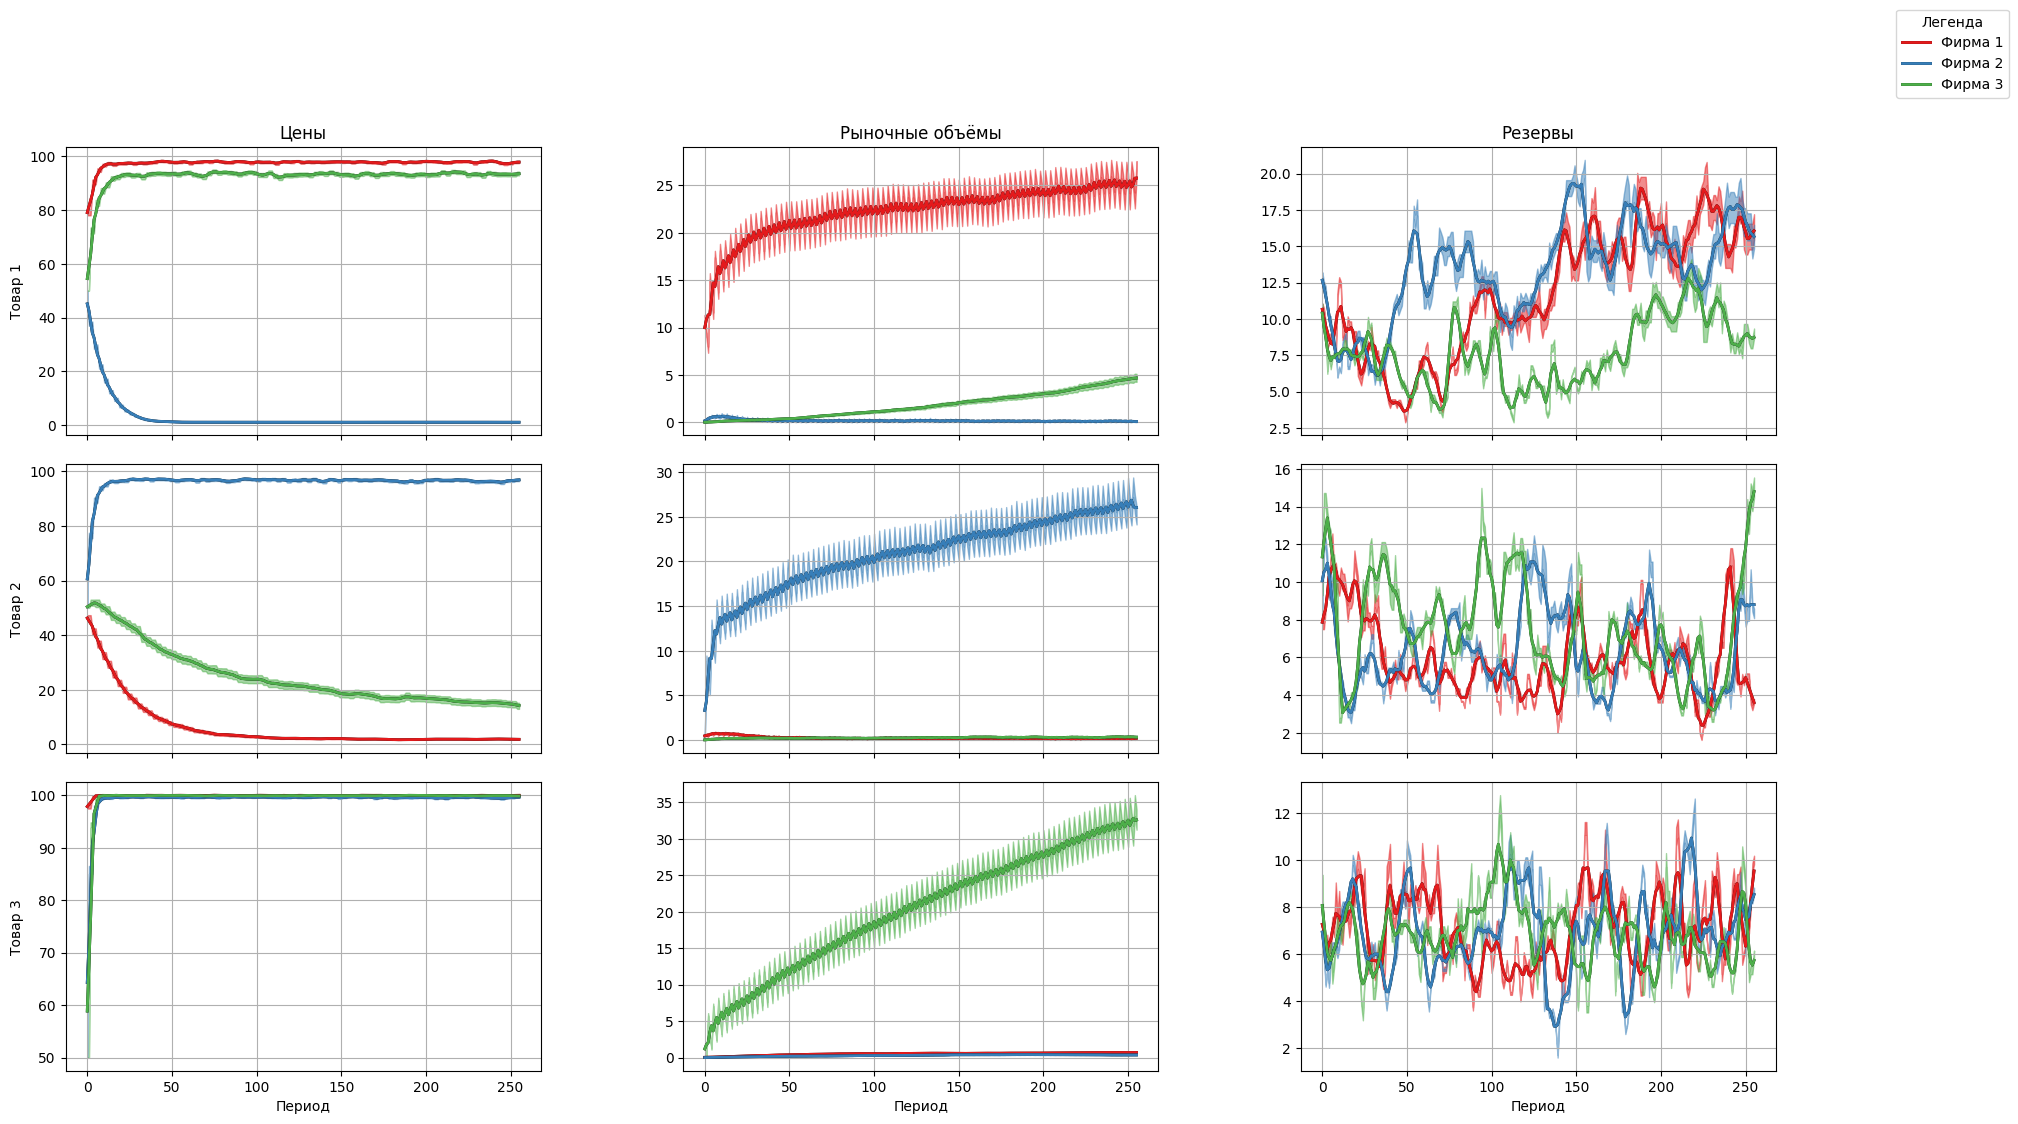

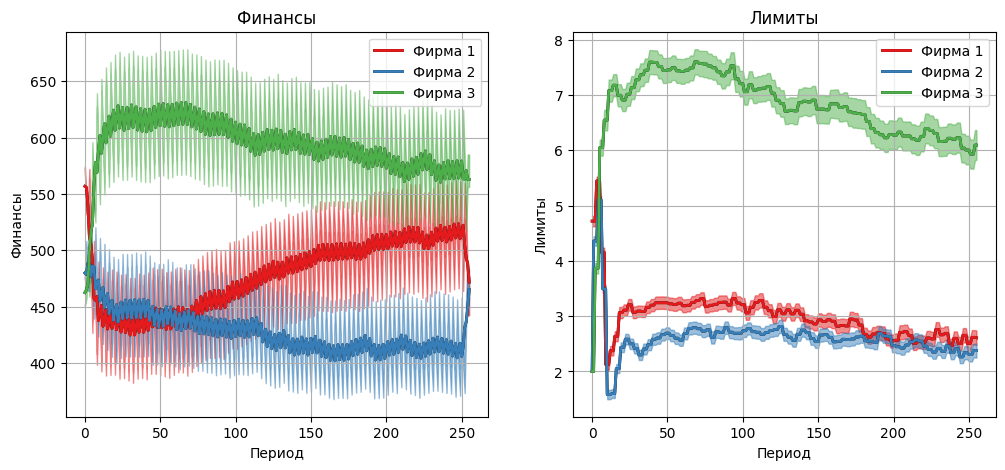

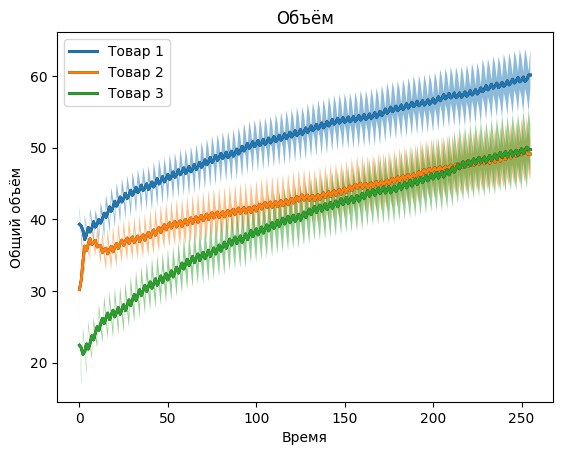

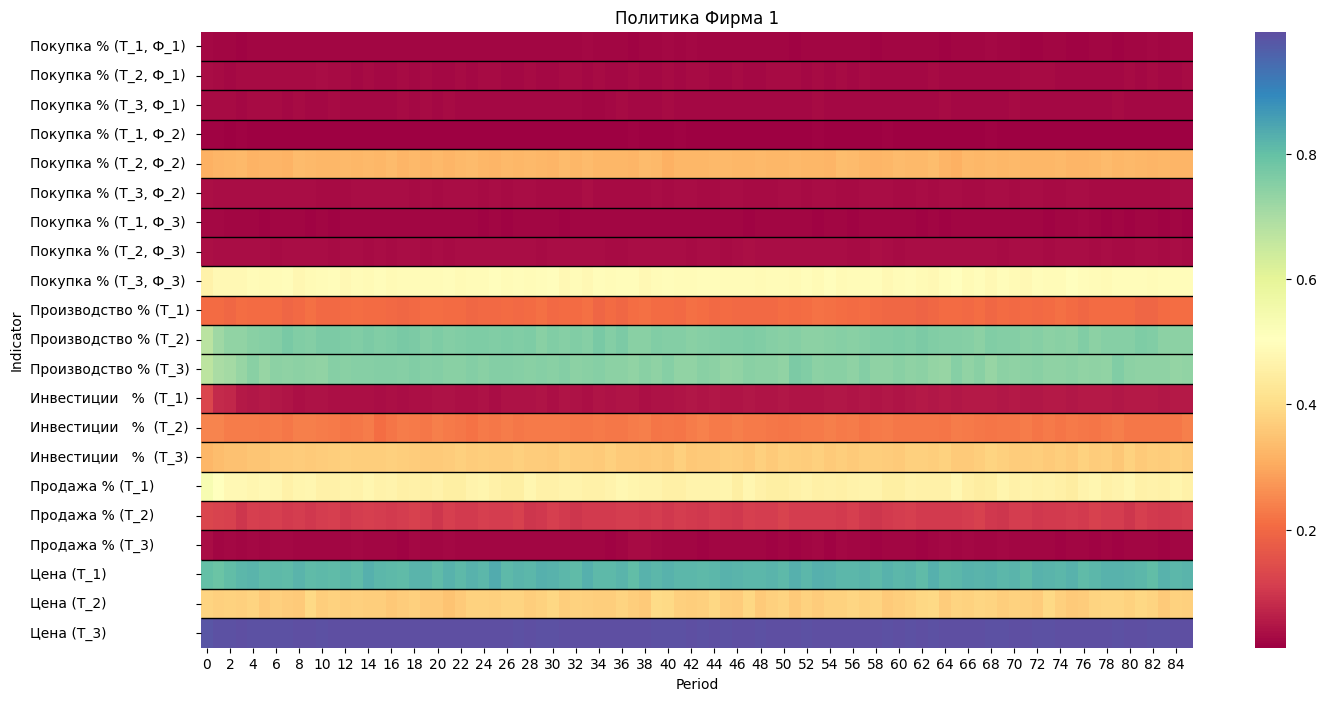

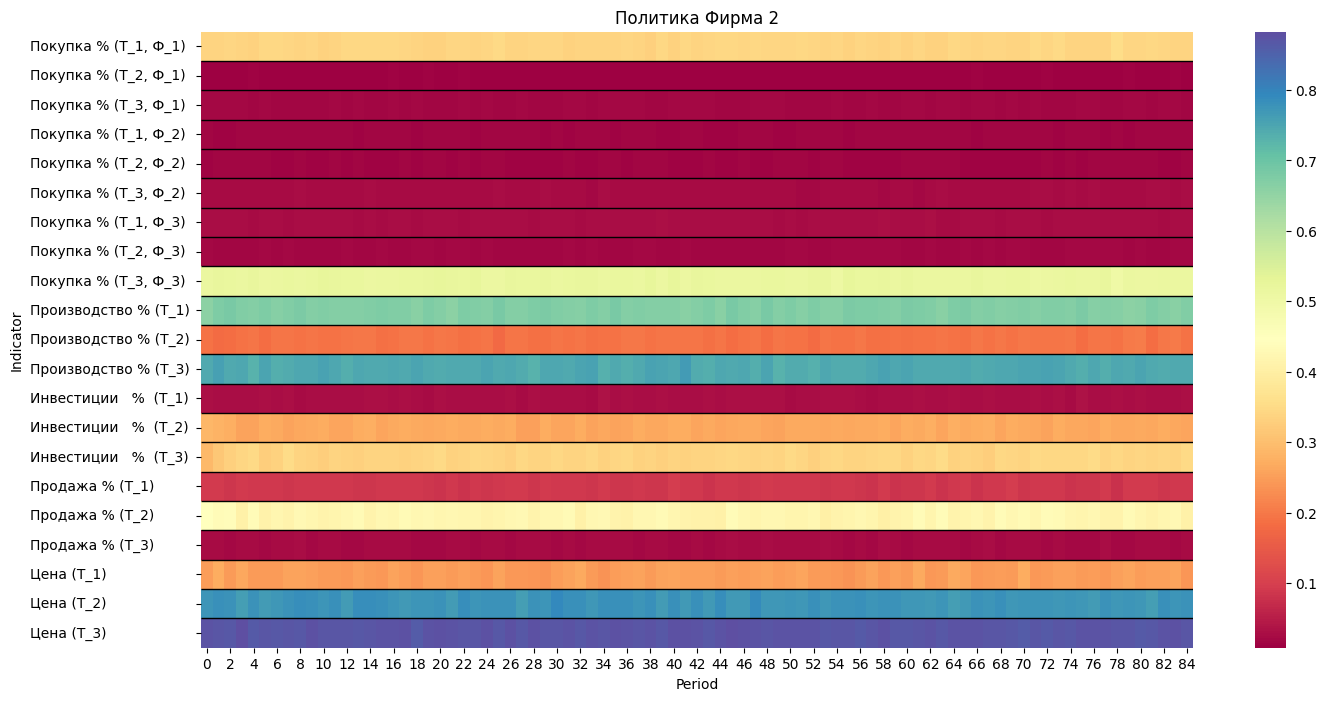

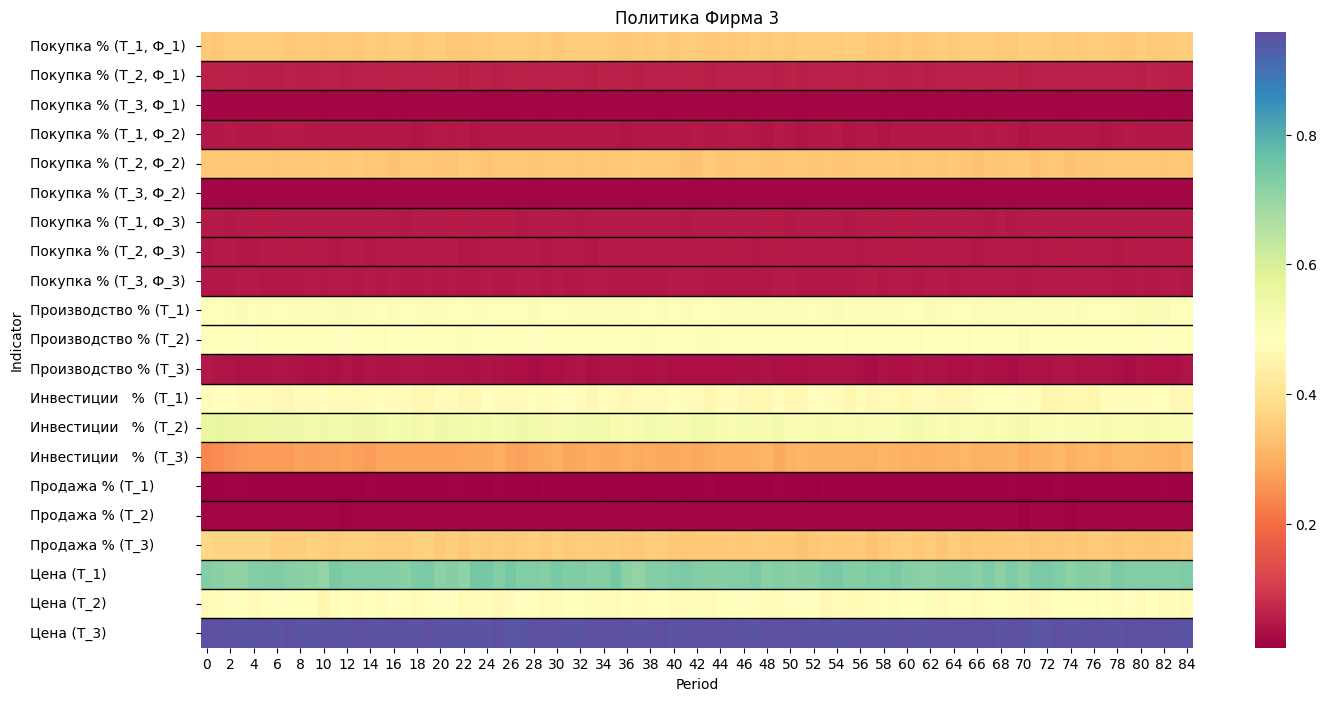

In [25]:
env.change_batch_size(1024)
env.reset()
n_periods = 256
for i in range(n_periods):
    env.step_and_record_batch(i % env.market.n_firms)
plot_environment_batch(env.state_history)
plot_volumes_batch(env.state_history)
plot_actions_batch(env.actions_history[0], 'Политика Фирма 1')
plot_actions_batch(env.actions_history[1], 'Политика Фирма 2')
plot_actions_batch(env.actions_history[2], 'Политика Фирма 3')